# Part 1

This project focuses on the **-Greater- San Francisco Bay Area of the United States**. I use the broader San Jose-San Francisco-Oakland Combined Statistical Area that is designated by the Office of Management and Budget in Northern California. The area includes the popular Bay Area, which consists of counties Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Solano and Sonoma, along with neighboring counties San Joaquin, Santa Cruz and San Benito. These counties are have strong social and economic ties, and can be seen as parts of a single body. In addition, they are (somewhat) similar in demographics. Each county has its own peculiarities, but such set of counties allows us to assume that these counties have very similar macro trends and this is not going to change in the near future. 
The motivation here in this part is to both understand the current situation of the housing market in the Greater Bay Area and to see how the components (counties) differ from each other. All works is done by using data visualization. 

## The Dataset

In [306]:
# import libraries
import pandas as pd 
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

The main subject is the county level time series data. Also, we need to extract the county ids from the county crosswalk to subset the main dataset correctly. First, import crosswalk csv file and index by the 'County Name' column, then reduce it to include only California Regions. 

In [210]:
crosswalk = pd.read_csv('CountyCrossWalk_Zillow.csv')
CA_indexes = crosswalk['StateName'] == 'California' 
crosswalk = crosswalk[CA_indexes]
print('Data available for {} counties in California'.format(crosswalk.shape[0]))
crosswalk = crosswalk.set_index('CountyName', drop = 'false')

Data available for 58 counties in California


For some reason, the time series dataset have 'United States' as the only non-numeric input in the column 'RegionName'. Rest of the data in this column is numerical. This becomes a problem when pandas reads in data, thus we use a converter that deals with the issue.

In [307]:
county_time_series = pd.read_csv('County_time_series.csv', 
                                 converters = {'RegionName': (lambda x: 0 if x == 'United_States' else int(x))})

Convert the elements of the 'Date' column to  datetime objects, which is really useful in plotting and analysis with pandas overall.

In [308]:
county_time_series['Date'] = pd.to_datetime(county_time_series['Date'], format ='%Y-%m-%d', errors = 'raise')     
county_time_series.sort_values(by = 'Date', na_position='first', inplace = True)
county_time_series.reset_index(drop =  True, inplace = True)

The project only cares about 12 counties. Subset the main dataset and only include rows about them.

In [309]:
counties = ['San Francisco', 'San Mateo', 'Marin', 'Alameda', 'Contra Costa', 'Santa Clara', 'Napa', 'Solano', 
            'Sonoma' ,'Santa Cruz', 'San Joaquin' ]
countyIds = crosswalk['FIPS'].loc[counties].values.tolist()
print('{} counties in subset'.format(len(countyIds)))

11 counties in subset


In [310]:
indexes = county_time_series['RegionName'].apply(lambda x: x in countyIds)
df = county_time_series.loc[indexes]

Let's have a look at the dataset. It covers the years 1996-2017, each data point consist of atrributes measured on a monthly basis.  It has a row for each region for a given date.  

In [232]:
print('Number of Rows: {}\nNumber of Columns : {}'.format(df.shape[0], df.shape[1]))

Number of Rows: 2827
Number of Columns : 89


In [233]:
df.head(3)

Date  RegionName  DaysOnZillow_AllHomes  \
752 1996-04-30        6013                    NaN   
758 1996-04-30        6001                    NaN   
771 1996-04-30        6055                    NaN   

     HomesSoldAsForeclosuresRatio_AllHomes  \
752                                    NaN   
758                                    NaN   
771                                    NaN   

     InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  \
752                                   NaN                    NaN   
758                                   NaN                    NaN   
771                                   NaN                    NaN   

     MedianListingPricePerSqft_1Bedroom  MedianListingPricePerSqft_2Bedroom  \
752                                 NaN                                 NaN   
758                                 NaN                                 NaN   
771                                 NaN                                 NaN   

     MedianListingPricePerSqft_3Bedroom  MedianListingPricePerSqft_4Bedroom  \
752                                 NaN                                 NaN   
758                                 NaN                                 NaN   
771                                 NaN                                 NaN   

                  ...                 ZHVI_BottomTier  ZHVI_CondoCoop  \
752               ...                        116400.0             NaN   
758               ...                        132500.0        138000.0   
771               ...                             NaN        152700.0   

     ZHVI_MiddleTier  ZHVI_SingleFamilyResidence  ZHVI_TopTier  ZRI_AllHomes  \
752         186600.0                    195800.0      327300.0           NaN   
758         190600.0                    204600.0      293000.0           NaN   
771         177300.0                    182700.0      275600.0           NaN   

     ZRI_AllHomesPlusMultifamily  ZriPerSqft_AllHomes  \
752                          NaN                  NaN   
758                          NaN                  NaN   
771                          NaN                  NaN   

     Zri_MultiFamilyResidenceRental  Zri_SingleFamilyResidenceRental  
752                             NaN                              NaN  
758                             NaN                              NaN  
771                             NaN                              NaN  

[3 rows x 89 columns]

In [234]:
df.tail(3)

Date  RegionName  DaysOnZillow_AllHomes  \
554016 2017-08-31        6097                    NaN   
554031 2017-08-31        6041                    NaN   
554038 2017-08-31        6055                    NaN   

        HomesSoldAsForeclosuresRatio_AllHomes  \
554016                                 0.5791   
554031                                 0.4612   
554038                                 0.4341   

        InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  \
554016                                 710.0                  843.0   
554031                                 312.0                  354.0   
554038                                 222.0                  252.0   

        MedianListingPricePerSqft_1Bedroom  \
554016                          547.425474   
554031                                 NaN   
554038                                 NaN   

        MedianListingPricePerSqft_2Bedroom  \
554016                          432.564330   
554031                          643.470790   
554038                          472.533395   

        MedianListingPricePerSqft_3Bedroom  \
554016                          406.030856   
554031                          598.958333   
554038                          441.194773   

        MedianListingPricePerSqft_4Bedroom               ...                 \
554016                          350.883255               ...                  
554031                          601.566872               ...                  
554038                          396.637266               ...                  

        ZHVI_BottomTier  ZHVI_CondoCoop  ZHVI_MiddleTier  \
554016         461900.0        376700.0         599000.0   
554031         721600.0        611300.0        1060900.0   
554038         479200.0        493900.0         599400.0   

        ZHVI_SingleFamilyResidence  ZHVI_TopTier  ZRI_AllHomes  \
554016                    618300.0      893500.0        2660.0   
554031                   1158800.0     1805100.0        4444.0   
554038                    612700.0      849300.0        2642.0   

        ZRI_AllHomesPlusMultifamily  ZriPerSqft_AllHomes  \
554016                       2633.0                1.786   
554031                       4356.0                2.640   
554038                       2636.0                1.790   

        Zri_MultiFamilyResidenceRental  Zri_SingleFamilyResidenceRental  
554016                          2279.0                           2700.0  
554031                          3294.0                           4679.0  
554038                          2390.0                           2677.0  

[3 rows x 89 columns]

This study takes a top-down approach. We are looking for aggregate attributes to summarize county characteristics. Our aim is to see the price levels, understand how the returns are (as rent and capital appreciation), check the market activity and understand how these change in time. Hence, we are looking for proxies in the dataset to measure such attributes.
Two aspects of the dataset require special attention. 
* Most of the columns in the dataset are highly correlated with each other. For example, 'MedianListingPricePerSqft_AllHomes', 'MedianSoldPrice_AllHomes' or 'ZHVI_AllHomes' are all capturing the underlying value of all homes. The dataset is full of examples like this.The code below plots the correlation matrix (represents the correlation between columns). It looks complicated but still good enough to visually compare. In the end, we only refer to it for specific columns, there is no reason to study this plot in detail. (Also effected by the missing values)

* There is a lot of missing data. For some columns more than the half of data is missing.

Combine all the information above, and understand that we look for instruments to measure attributes in county level. To do so we should work with features that are good proxies and of course, we prefer to work with the minimum amount of missing data.



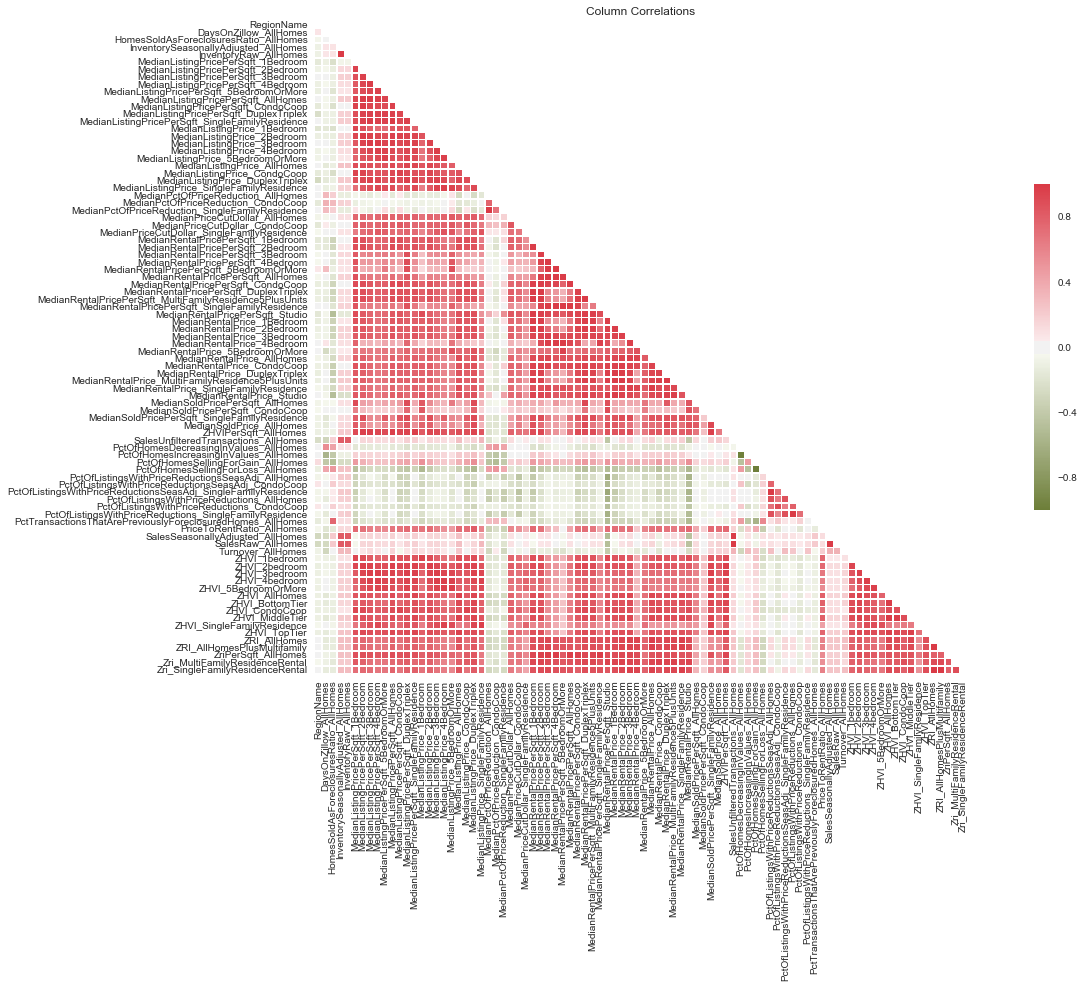

In [311]:
sns.set(style="white")

corr = county_time_series.corr()
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(24, 12))
cmap = sns.diverging_palette(100, 10, as_cmap=True)
ax = sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Column Correlations')
plt.show()

In [312]:
#add county name as a new column
CountyName = [None for i in df['RegionName'].values]
for i, value in enumerate(df['RegionName'].values):
    index = countyIds.index(value)
    county = counties[index]
    CountyName[i] = county
pd.options.mode.chained_assignment = None
df['CountyName'] = pd.Series(CountyName, index = df.index)    
    

The current state of the market can be understood by looking at the period after June 2017 (3Q17). This is rather arbitrary and not the best practice due to possible cyclical behavior of data. However, it still gives us a close approximation and a good place to start. 

In [313]:
date_index_after_2017 = df['Date'].apply(lambda x: (x.month >= 6) & (x.year >= 2017) )
df_2017 = df.loc[date_index_after_2017]
df_2017.reset_index(inplace = True, drop = True)

Take the mean of the last 3 months and aggreagate.

In [246]:
df_2017_agg = df_2017.pivot_table(index = 'CountyName', aggfunc = np.mean)
df_2017_agg.reset_index(inplace = True)

There are 89 columns in this dataset and we would like to know the amount of information they include.

In [314]:
def get_percent_notnull(column):
    #calculate percentage not null in a column
    nulls = column.isnull().sum()
    length = column.shape[0]
    return 1 - round(nulls / length, 2)

In [315]:
columns_percent_notnull = df_2017_agg.apply(lambda x: get_percent_notnull(x))
columns_percent_notnull.sort_values(ascending = False)
df_2017_agg.loc[:, columns_percent_notnull >= 0.8].columns

Index(['CountyName', 'DaysOnZillow_AllHomes',
       'HomesSoldAsForeclosuresRatio_AllHomes', 'InventoryRaw_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_2Bedroom', 'MedianListingPrice_3Bedroom',
       'MedianListingPrice_4Bedroom', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPctOfPriceReduction_SingleFamilyResidence',
       'MedianPriceCutDollar_AllHomes',
       'MedianPriceCutDollar_SingleFamilyResidence',
       'MedianRentalPricePerSqft_2Bedroom',
       'MedianRentalPricePerSqft_3Bedroom',
       'MedianRentalPriceP

## Comparison of Real Estate Markets

### The Current State

The overall value of a home in a given region can be measured using couple different columns. 'Median sold price' is not available for 2017, but another attribute 'Median Listing Price' is similar. Let's plot it too see the current price levels. 
Expectedly, counties in the heart of the Bay Area are more expensive. A house in San Joaquin is the cheapest.

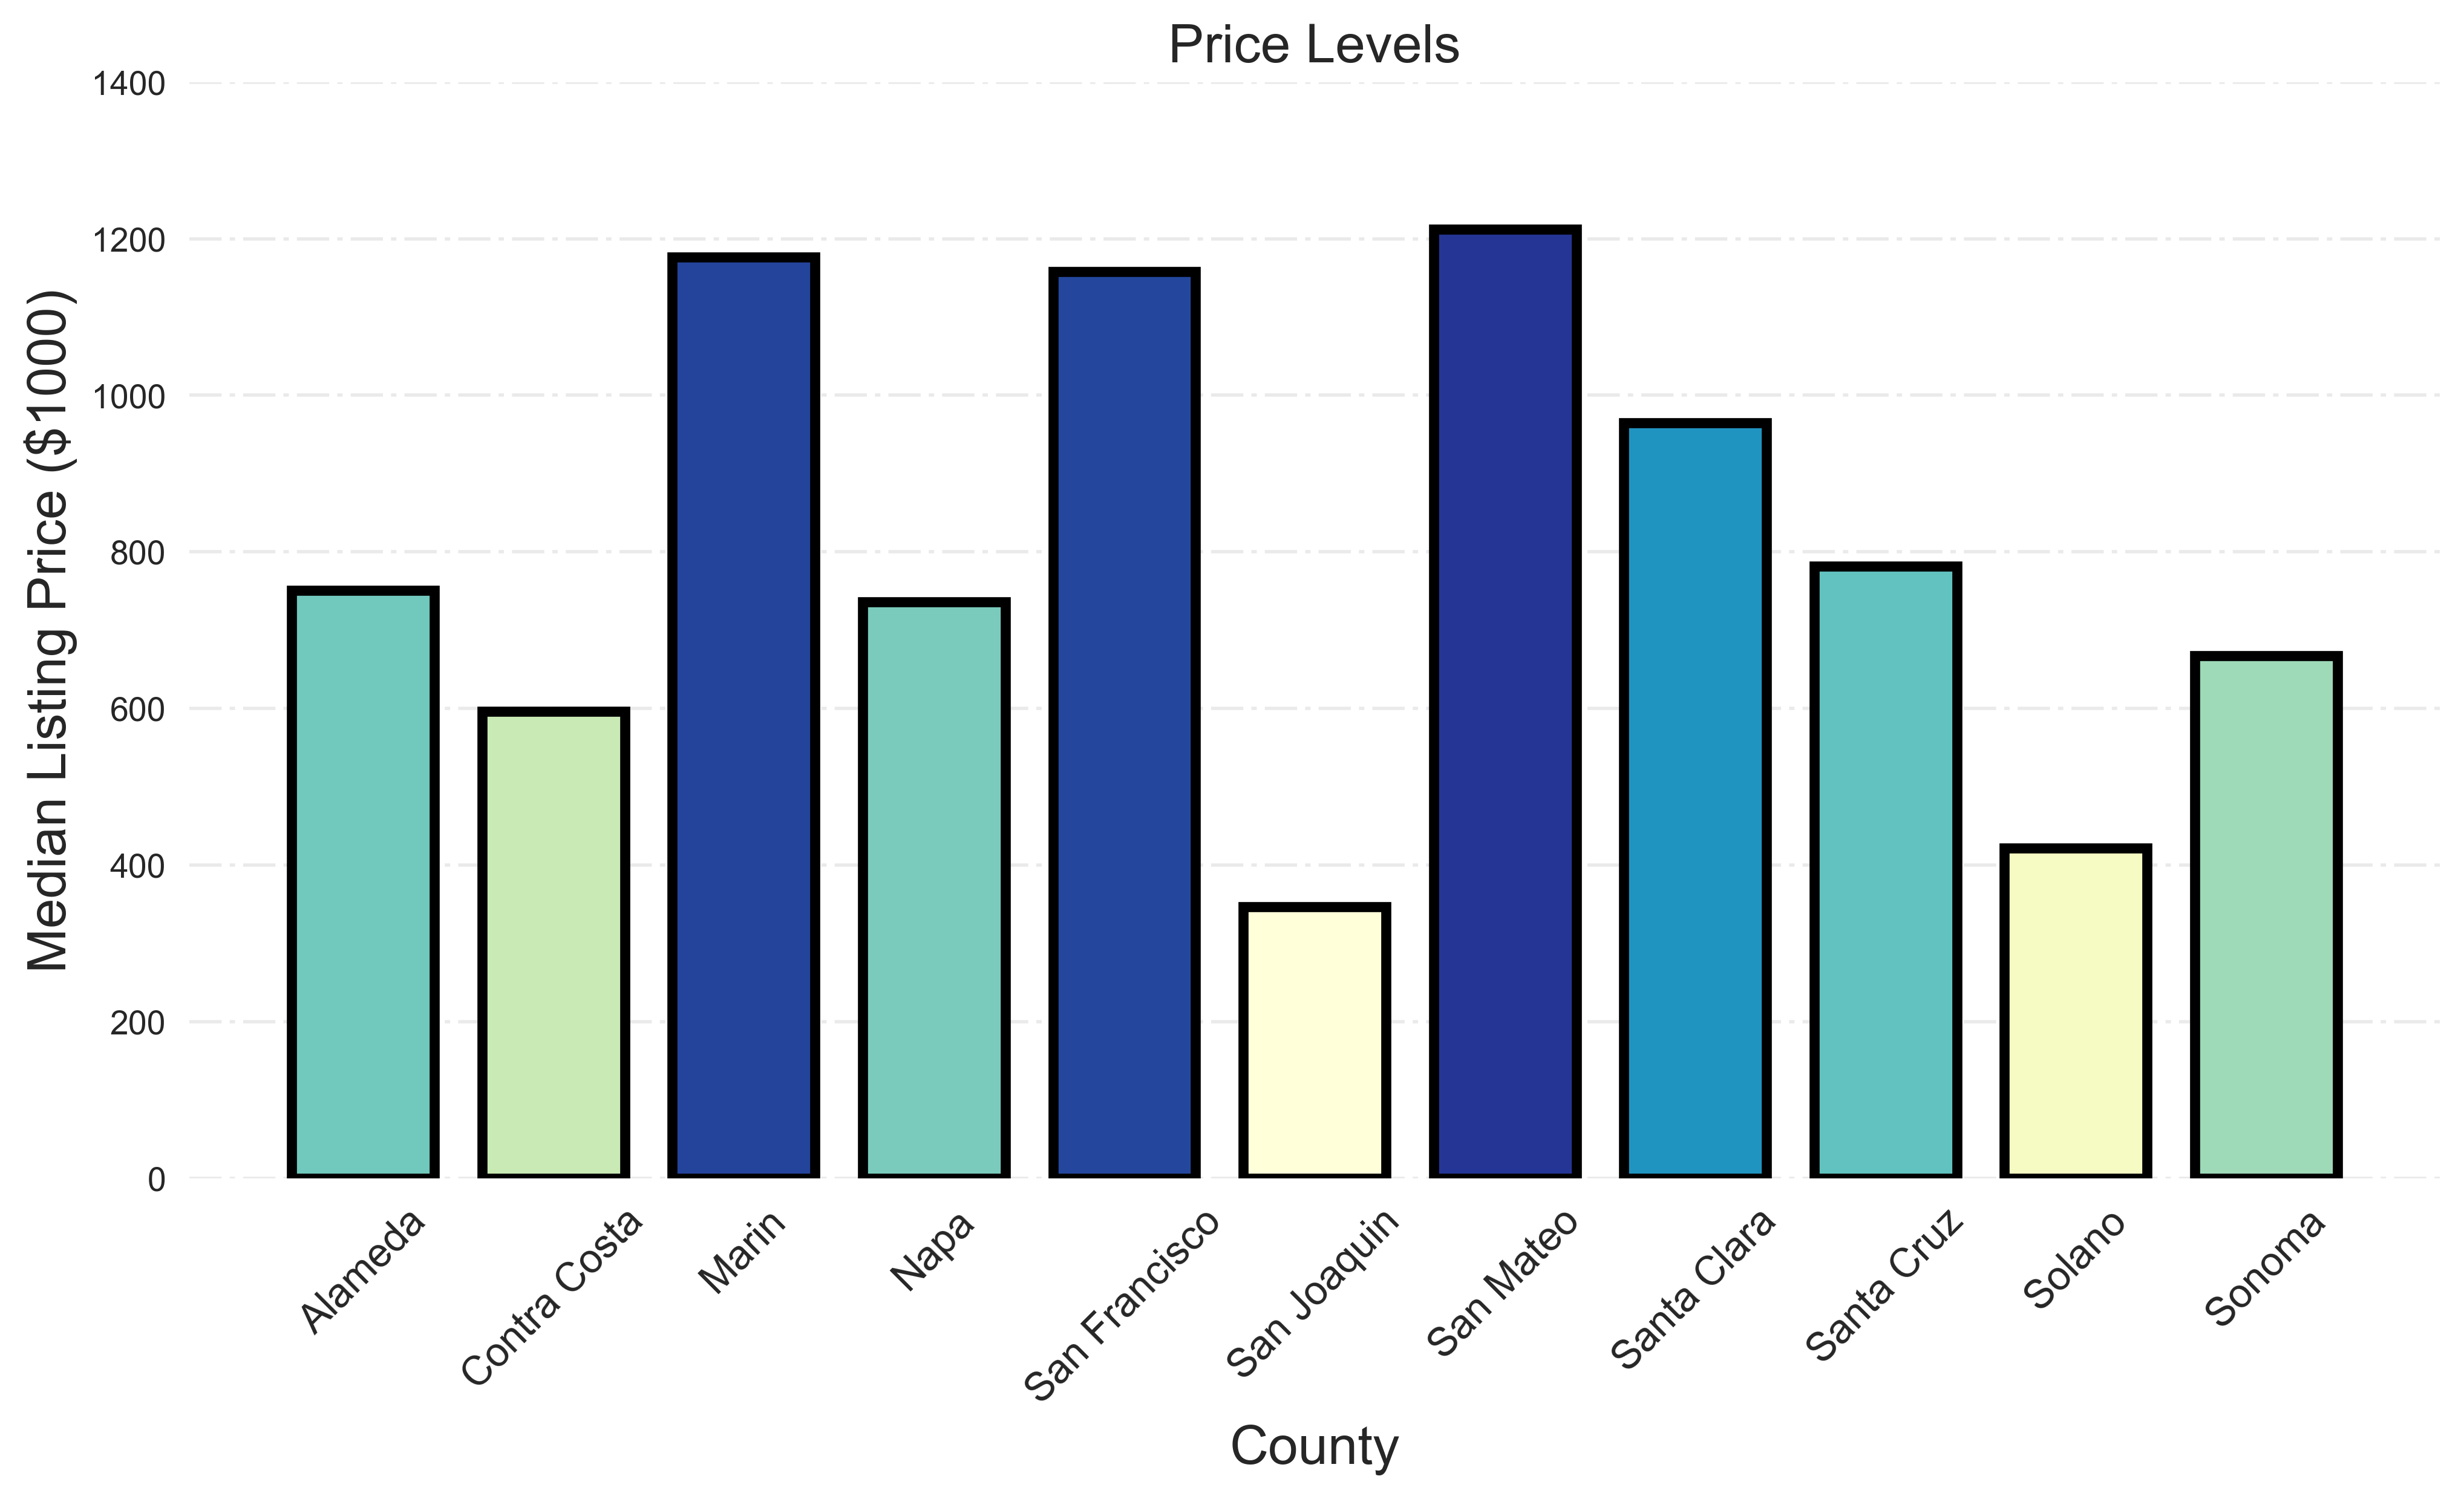

In [274]:
bar_positions = np.arange(0,11)
colors = plt.cm.YlGnBu(np.linspace(0, 1, 100))
bar_positions = np.arange(0,11)
fig, ax = plt.subplots(figsize = (12,6), dpi = 400)
for i in df_2017_agg.index:
    ax.bar(bar_positions[i], df_2017_agg.loc[i, 'MedianListingPrice_AllHomes'], 0.75, 
           color = colors[int((df_2017_agg.loc[i, 'MedianListingPrice_AllHomes']-df_2017_agg['MedianListingPrice_AllHomes'].min())*0.0001)],
           label = df_2017_agg.loc[i, 'CountyName'], edgecolor = 'black', linewidth = 3 )
ax.set_title('Price Levels', fontsize = 16)
ax.set_xlabel('County', fontsize = 16)
ax.set_ylabel('Median Listing Price ($1000)', fontsize = 16) 
ax.set_xticks(np.arange(0,11, 1))
ax.set_yticks(np.arange(0,1500000, 200000))
ax.set_xticklabels(df_2017_agg['CountyName'].values, rotation = 45, fontsize = 12)
ax.set_yticklabels(np.arange(0,1500,200))
ax.tick_params(bottom="on", top="off", left="off", right="off")
ax.yaxis.grid(linestyle = '-.', alpha = 0.4)
ax.set_axisbelow(True)
for key,spine in ax.spines.items():
    spine.set_visible(False)
plt.show()

Now, we focus on the 'Price to Rent Ratio'. This is a simple measure for the size of the returns in the form of rent.
Divide the total price by the total yearly rent, and see how many years it will take the get your money back. Generally speaking, Price to Rent ratio below 15 is considered as good investment. Based only this attribute, the area seems very expensive to buy as an investment, except Solano and San Joaquin. 

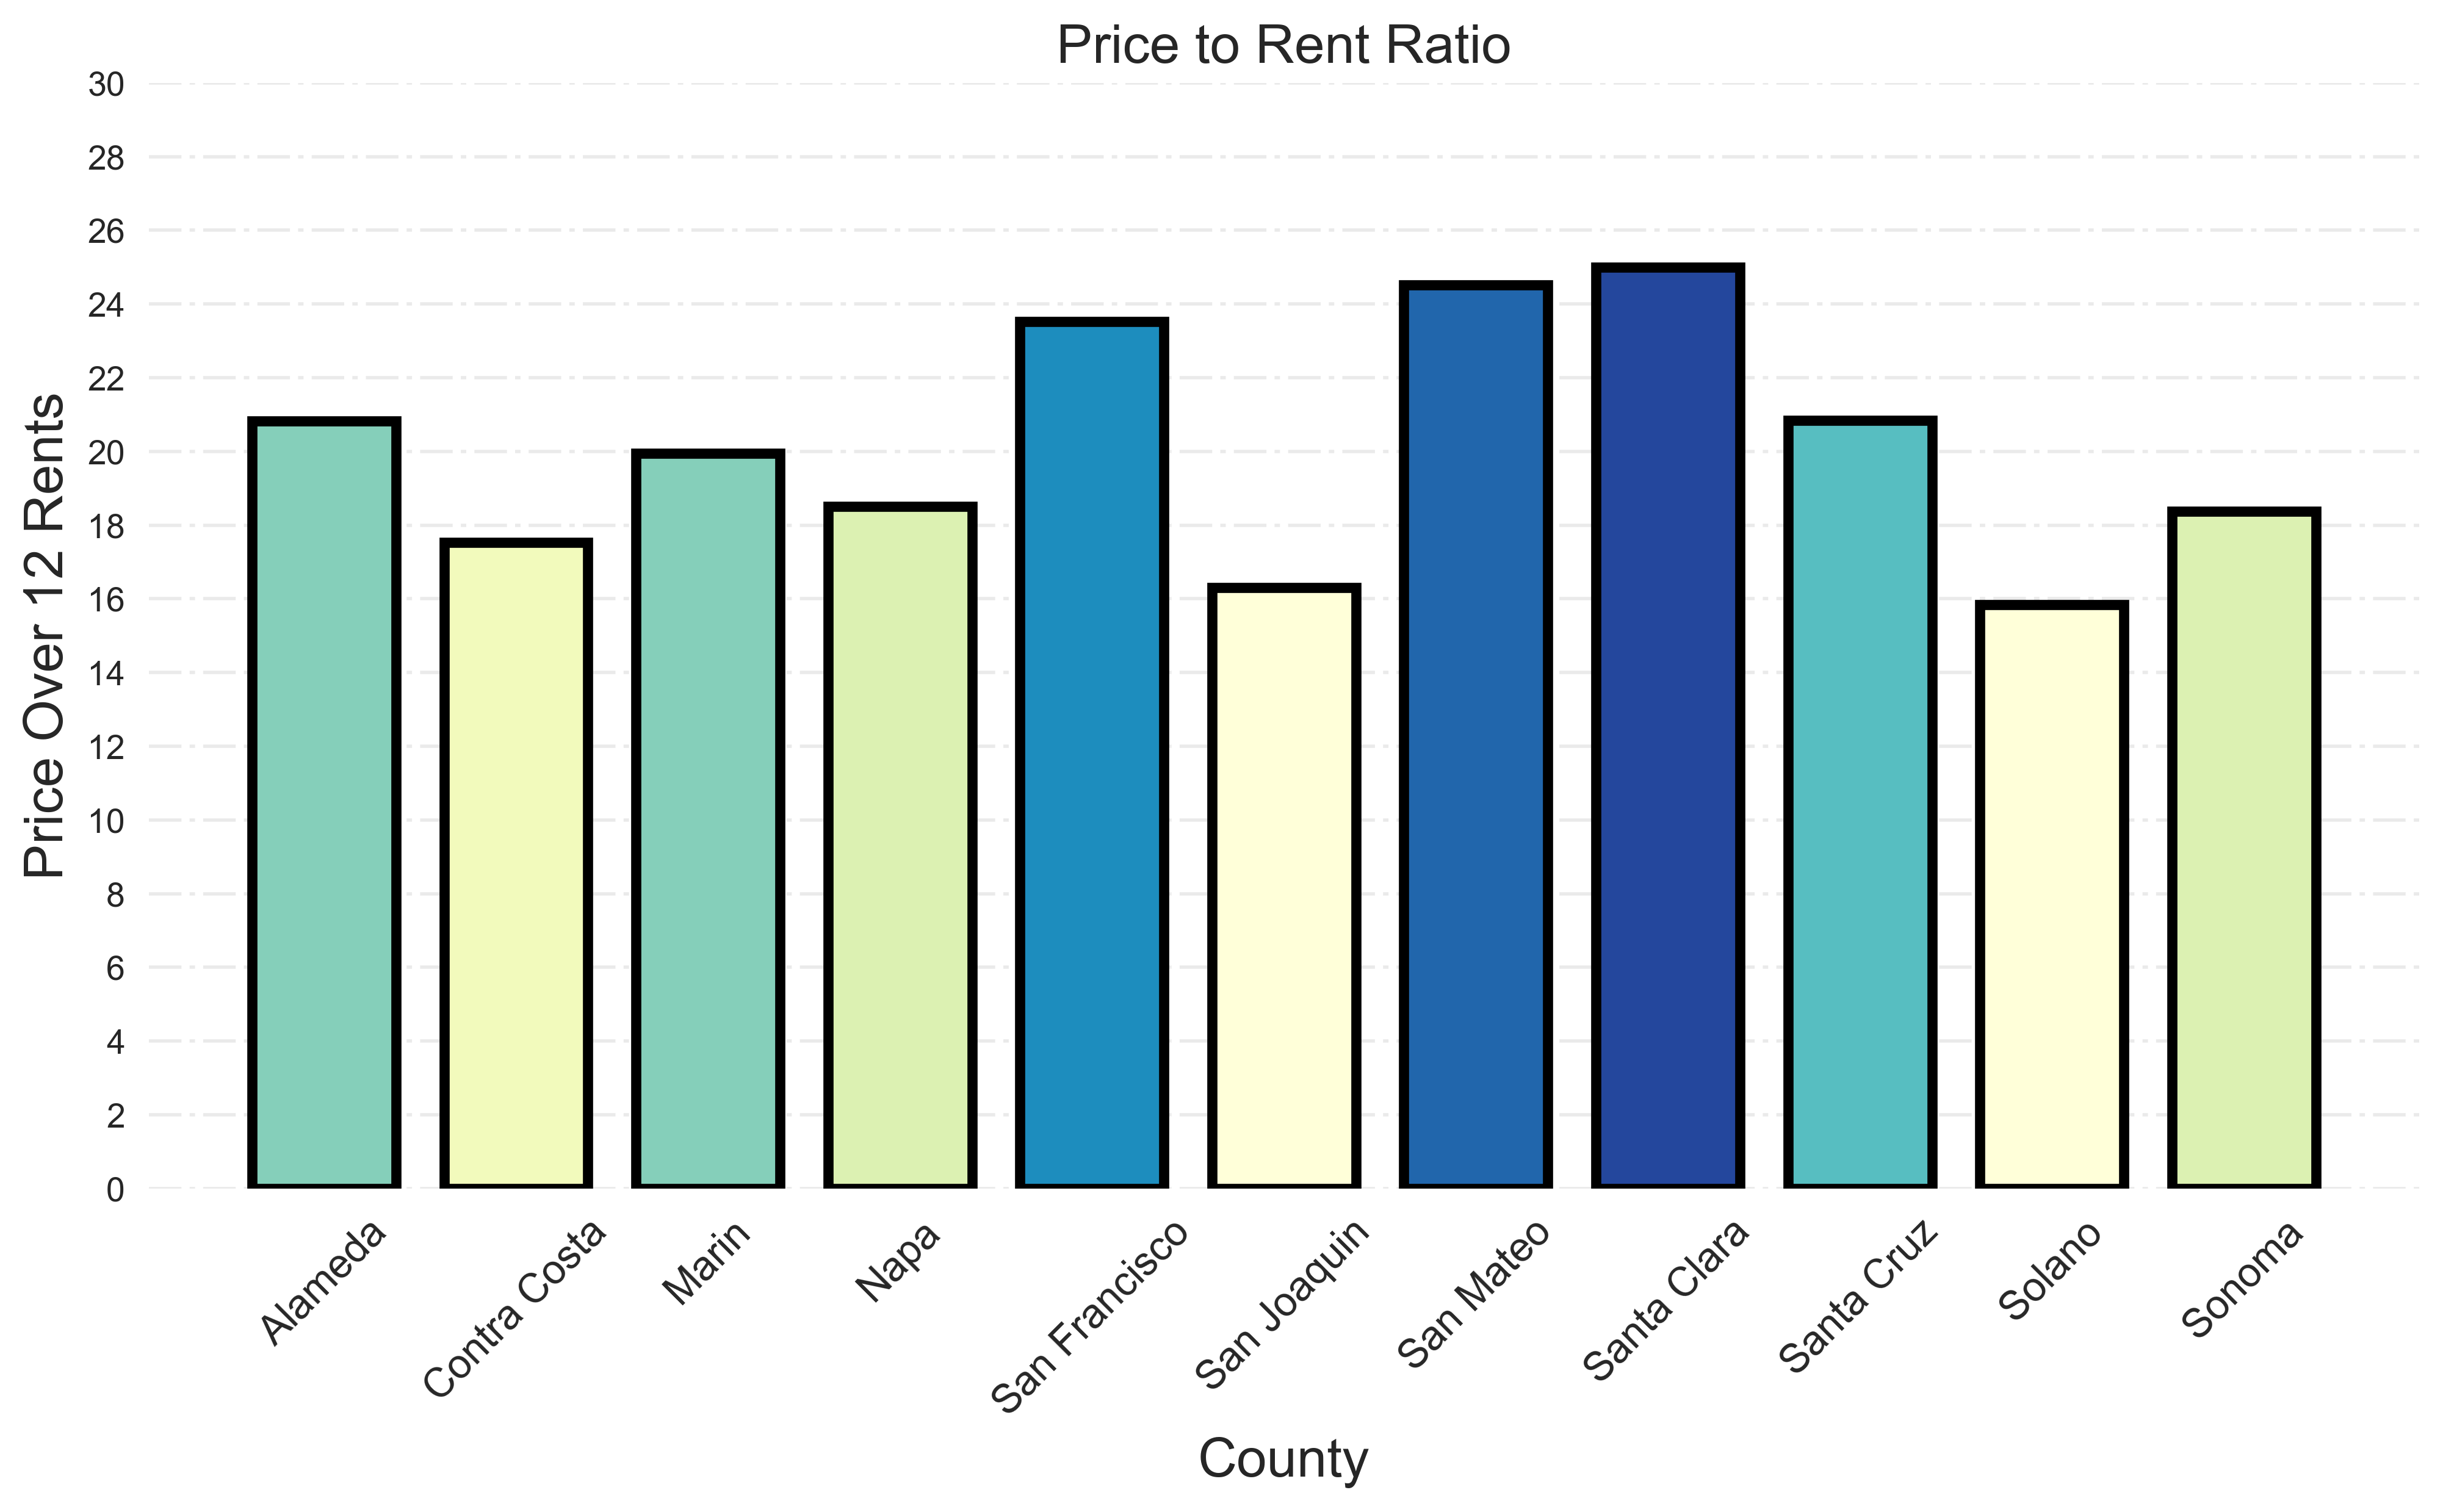

In [316]:
bar_positions = np.arange(0,11)
colors = plt.cm.YlGnBu(np.linspace(0, 1, 12))
fig, ax = plt.subplots(figsize = (12,6), dpi = 400)
for i in df_2017_agg.index:
    ax.bar(bar_positions[i], df_2017_agg.loc[i, 'PriceToRentRatio_AllHomes'], 0.75, 
           color = colors[int(df_2017_agg.loc[i, 'PriceToRentRatio_AllHomes']-df_2017_agg['PriceToRentRatio_AllHomes'].min())],
           label = df_2017_agg.loc[i, 'CountyName'], edgecolor = 'black', linewidth = 3 )
ax.set_title('Price to Rent Ratio', fontsize = 16)
ax.set_xlabel('County', fontsize = 16)
ax.set_ylabel('Price Over 12 Rents', fontsize = 16) 
ax.set_xticks(np.arange(0,11, 1))
ax.set_yticks(np.arange(0,32, 2))
ax.set_xticklabels(df_2017_agg['CountyName'].values, rotation = 45 , fontsize = 12)
ax.tick_params(bottom="on", top="off", left="off", right="off")
ax.yaxis.grid(linestyle = '-.', alpha = 0.4)
ax.set_axisbelow(True)
for key,spine in ax.spines.items():
    spine.set_visible(False)
plt.show()

Combine all this in a single scatter plot to see affordability and return together. A house in San Joaquin and Solano seems rather inexpensive while also paying itself off quickly. However, can you say that these investments are equally risky ? Definitely not.

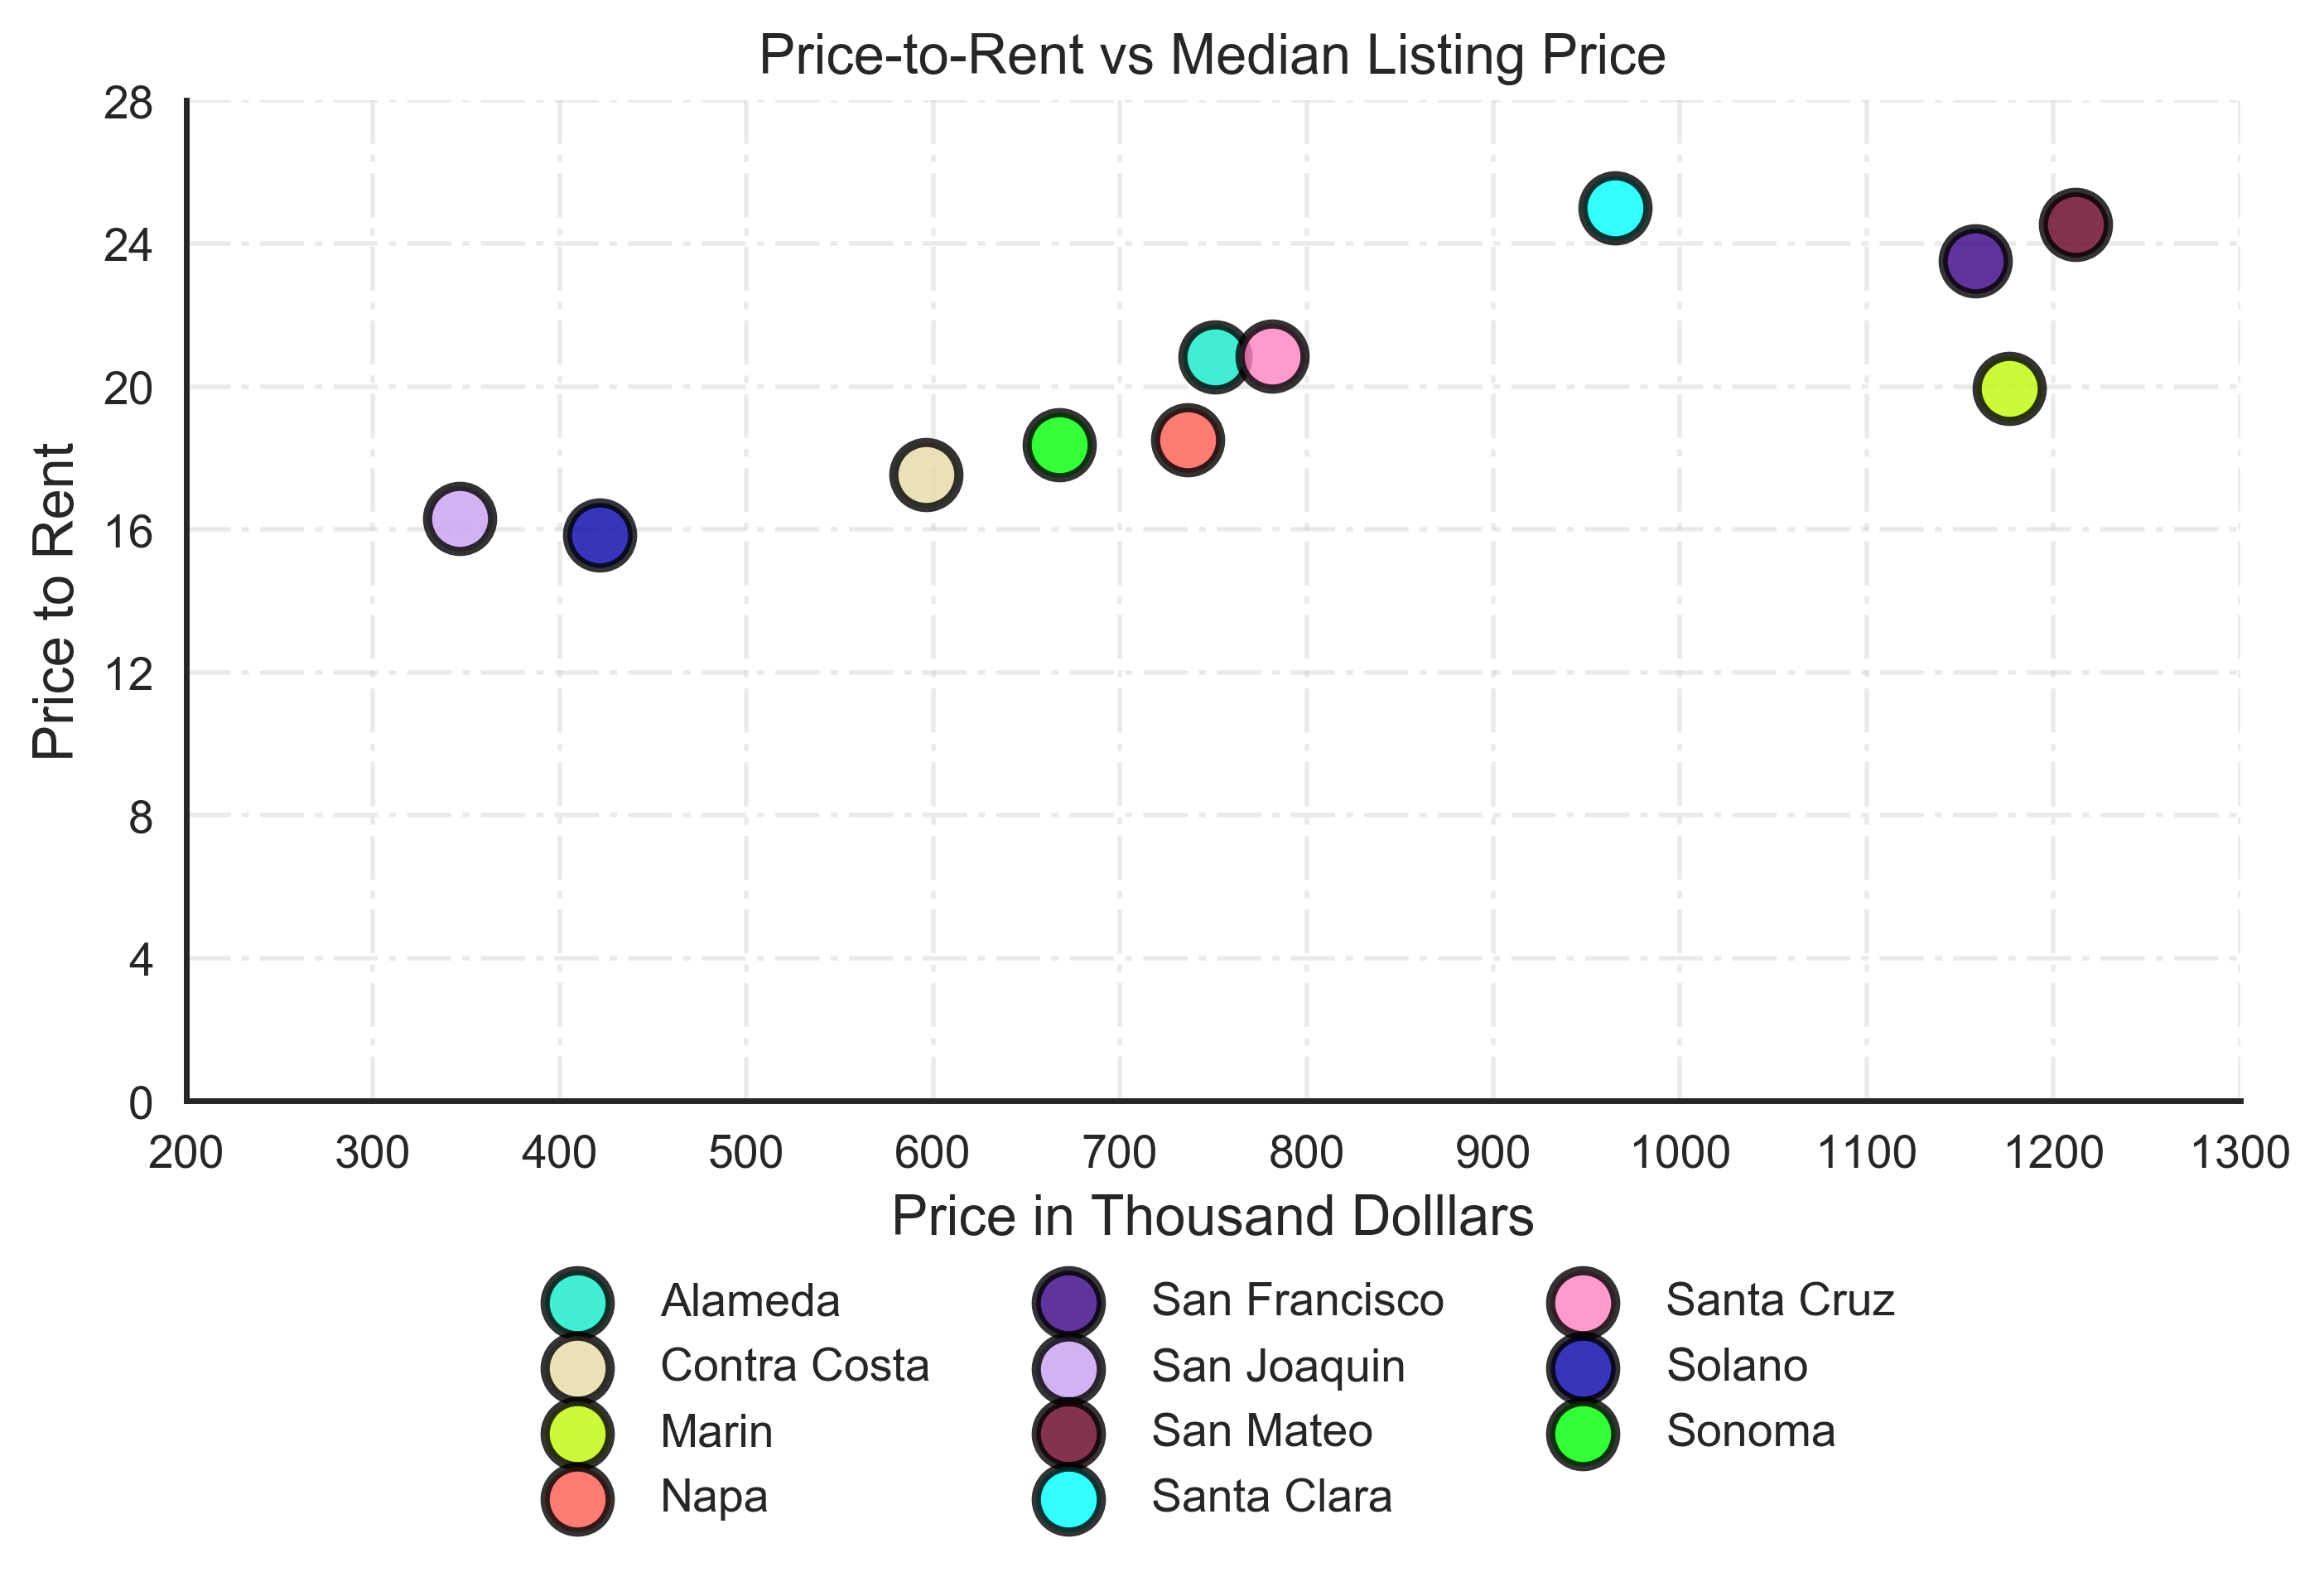

In [318]:
%matplotlib inline
colors = ['xkcd:aqua', 'xkcd:beige', 'xkcd:chartreuse', 'xkcd:coral', 'xkcd:indigo', 'xkcd:lavender', 
          'xkcd:maroon', 'xkcd:cyan', 'xkcd:pink', 'xkcd:royal blue', 'xkcd:bright green']
fig, ax = plt.subplots(figsize = (8, 4), dpi = 400)
for i in df_2017_agg.index:
    ax.scatter(df_2017_agg.loc[i, 'MedianListingPrice_AllHomes'], df_2017_agg.loc[i, 'PriceToRentRatio_AllHomes'], 
               c= colors[i] ,
               alpha=0.8, linewidth=2,
               edgecolor = 'black' , label = df_2017_agg.loc[i ,'CountyName'],
               s = 200)
ax.set_title('Price-to-Rent vs Median Listing Price')
ax.set_xlabel('Price in Thousand Dolllars', fontsize = 12)
ax.set_ylabel('Price to Rent', fontsize = 12)   
ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.grid(linestyle = '-.', alpha= 0.4)
ax.set_yticks(np.arange(0,32, 4))
ax.set_xticks(np.arange(200000,1400000, 100000))
ax.set_xticklabels(np.arange(200,1400, 100))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend( loc = 'center', bbox_to_anchor = (0.5, - 0.3), frameon = False, ncol = 3)
plt.show()

Other than the prices and returns, market activity is important. 'Turnover rate' captures the number of houses sold in every 10000 houses and 'Inventory' is the number of listings on Zillow. Higher turnover rate implies a more active market ( or more transactions for brokers) . The scatter plot below helps us to compare market activity in a region. Unfortunately, data is missing for Solano and San Francisco. San Joaquin market seems hotter than the others.

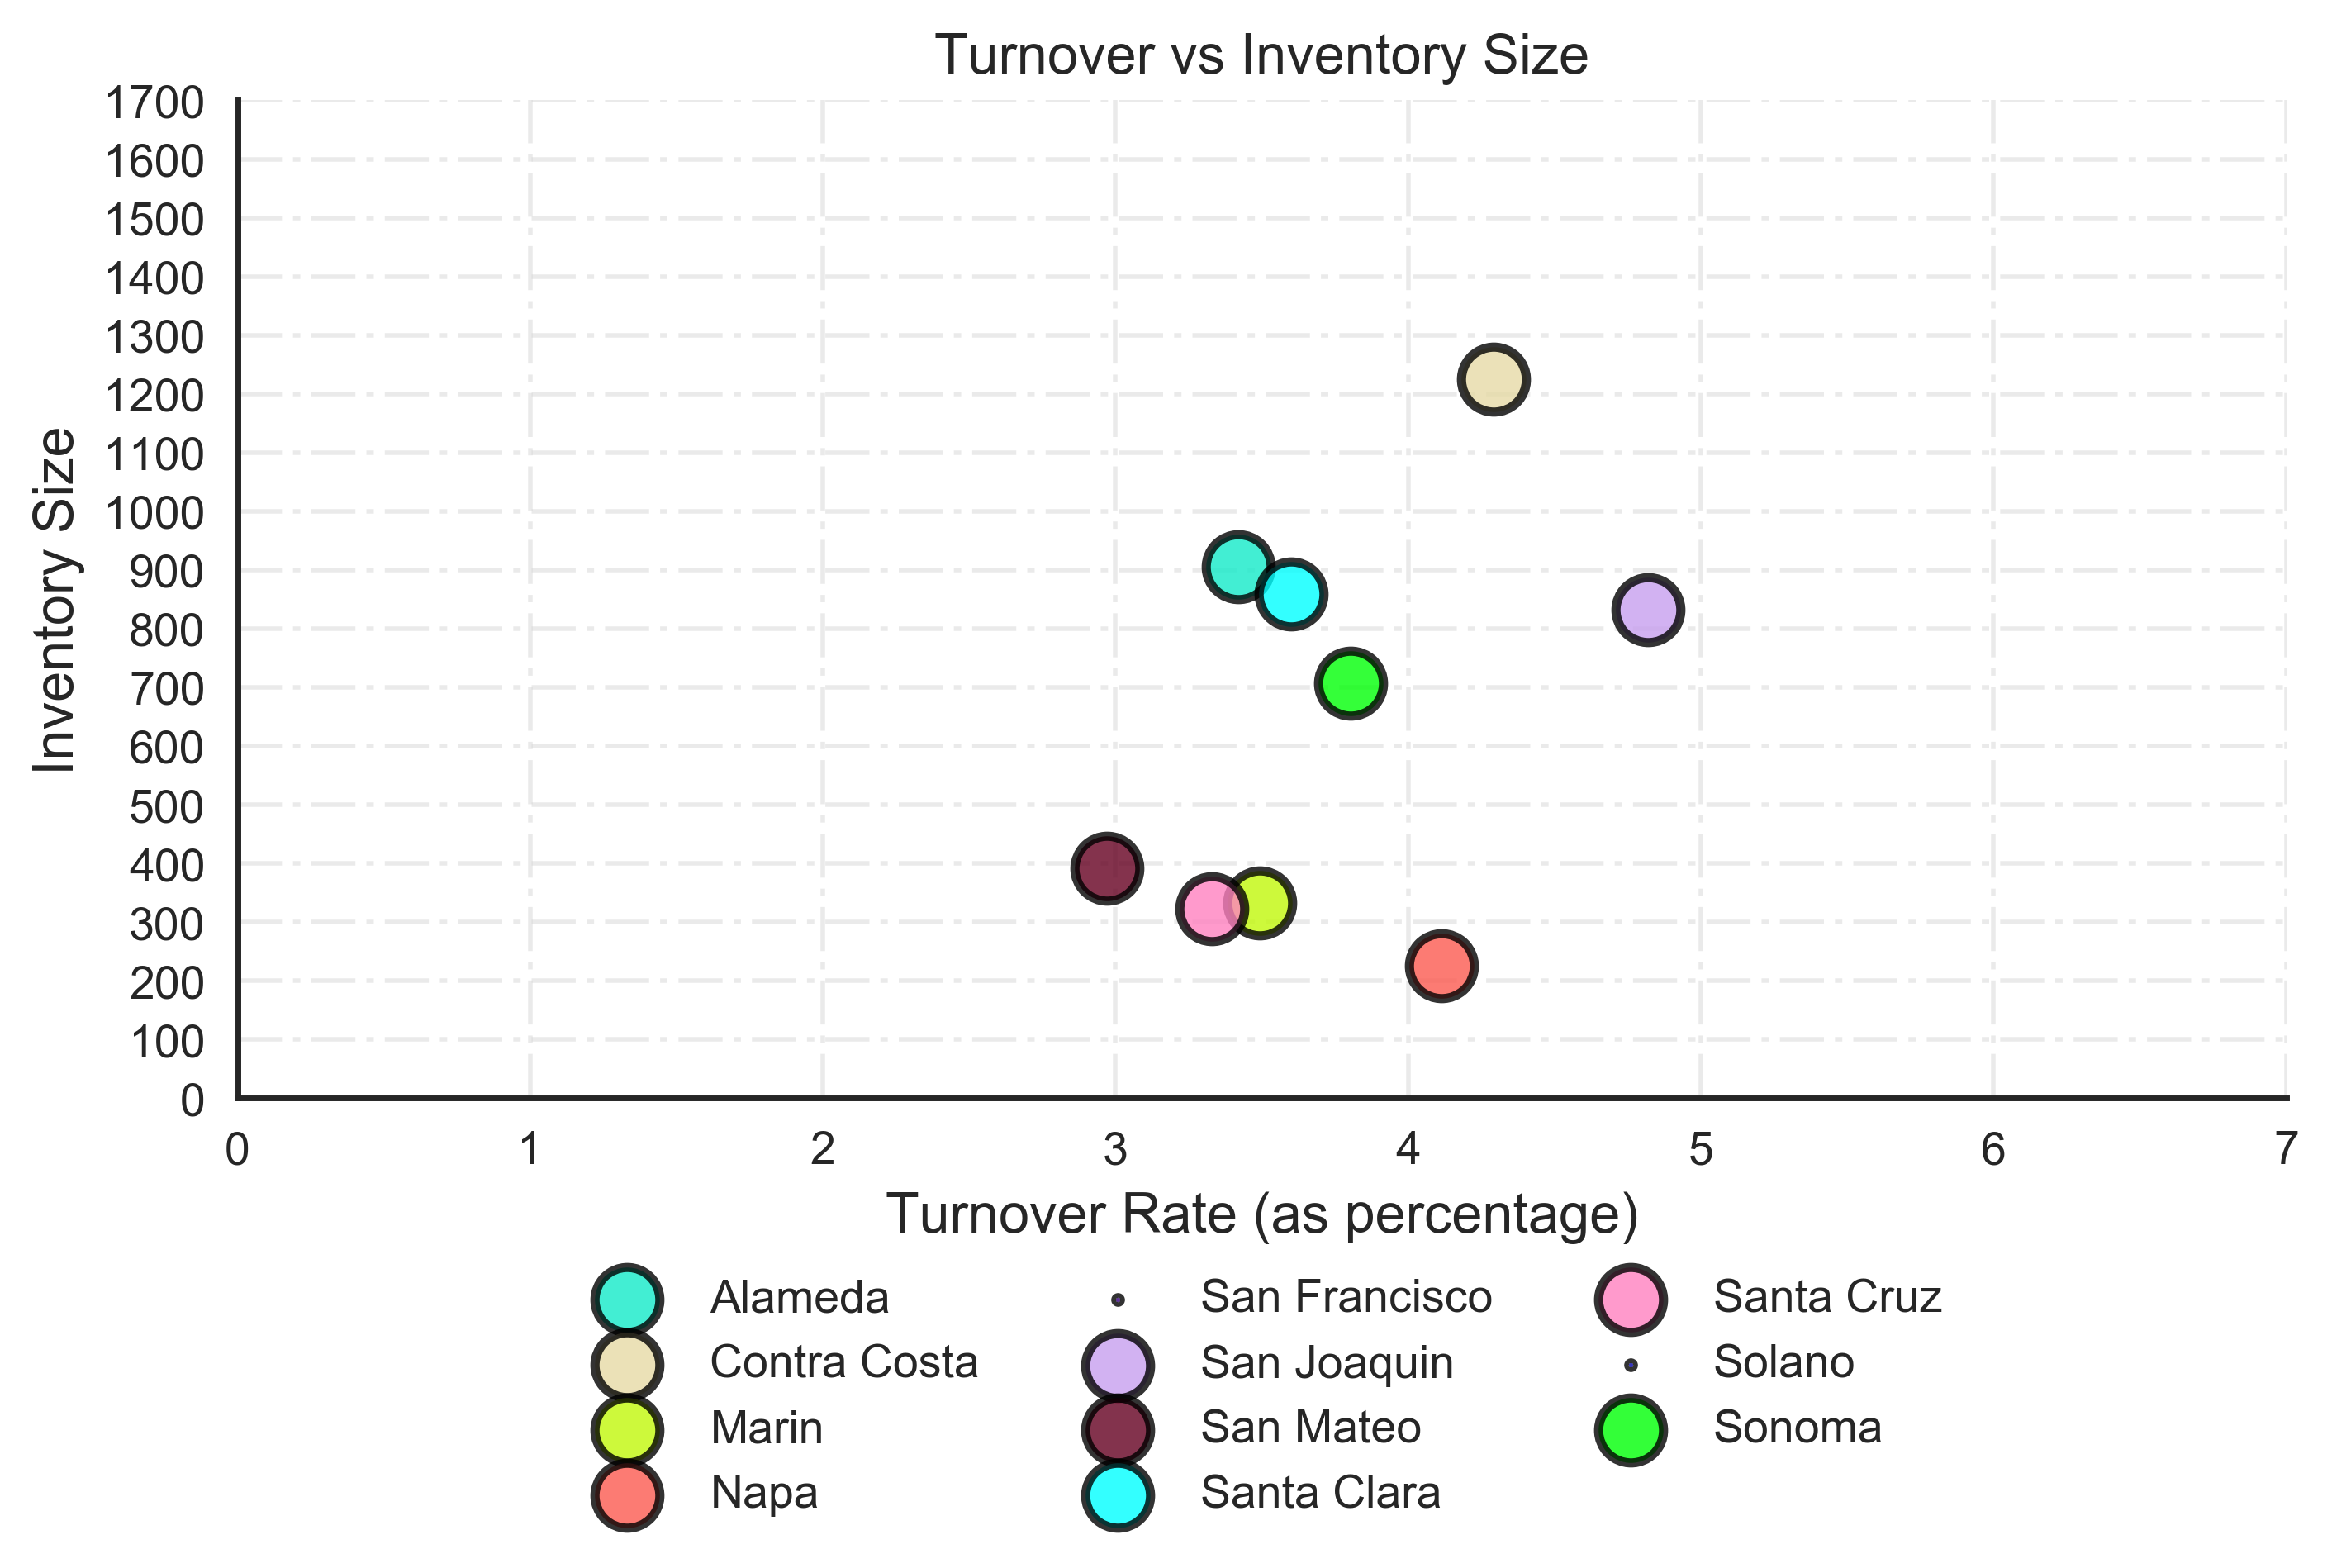

In [277]:
%matplotlib inline
colors = ['xkcd:aqua', 'xkcd:beige', 'xkcd:chartreuse', 'xkcd:coral', 'xkcd:indigo', 'xkcd:lavender', 
          'xkcd:maroon', 'xkcd:cyan', 'xkcd:pink', 'xkcd:royal blue', 'xkcd:bright green']
fig, ax = plt.subplots(figsize = (8, 4), dpi = 400)
for i in df_2017_agg.index:
    ax.scatter(df_2017_agg.loc[i, 'Turnover_AllHomes'], df_2017_agg.loc[i, 'InventorySeasonallyAdjusted_AllHomes'], 
               c= colors[i] ,
               alpha=0.8, linewidth=2,
               edgecolor = 'black' , label = df_2017_agg.loc[i ,'CountyName'],
               s = 200
               )
ax.set_title('Turnover vs Inventory Size')
ax.set_xlabel('Turnover Rate (as percentage)', fontsize = 12)
ax.set_ylabel('Inventory Size', fontsize = 12)   
ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.grid(linestyle = '-.', alpha= 0.4)
ax.set_yticks(np.arange(0,1800, 100))
ax.set_xticks(np.arange(0,8, 1))
ax.set_xticklabels(np.arange(0,8, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend( loc = 'center', bbox_to_anchor = (0.5, - 0.3), frameon = False, ncol = 3)
plt.show()

### Time Series Analysis

Interesting conclusions can be inferred from time series analysis. Plots will reveal the strong effect of 2008 that persisted over several years. Time series analysis will show the capital appreciation(depreciation) over the years, which is another form of return that real estate investors look to receive. 
To get a full grasp of whats been going on, we need a dataset that covers the period before  and after the crisis. Year 2004 seems to satisfy this condition.

In [278]:
date_index_after_2004 = df['Date'].apply(lambda x: x.year >= 2004)
df_cut = df.loc[date_index_after_2004]
df_cut.reset_index(inplace = True, drop = True)

This time we use the ['ZHVI Index'](https://www.zillow.com/wikipages/What's-the-Zillow-Home-Value-Index/) to measure the value of an house in a region. It is available for almost every period and it can be justified easily by looking at its correlation with the 'Median Listing Price'.
The heat map below summarizes the price development over the period for a county based on monthly measurements. After 2008 the prices start the drop and return to pre-2008 levels as late as 2014. The details are more visible in the next line chart. We can see that counties San Joaquin, Napa, Contra Costa, Sonoma and Solano are still below 2008 levels. Alameda quickly became more expensive than Santa Cruz.

In [324]:
print('Correlation Between Columns {}'.format(corr['ZHVI_AllHomes']['MedianListingPrice_AllHomes']))

Correlation Between Columns 0.948102203082944


In [325]:
df_mini = df_cut.pivot('CountyName', 'Date', 'ZHVI_AllHomes')
df_mini.sort_values(by = df_mini.columns[0], inplace = True, ascending =True)

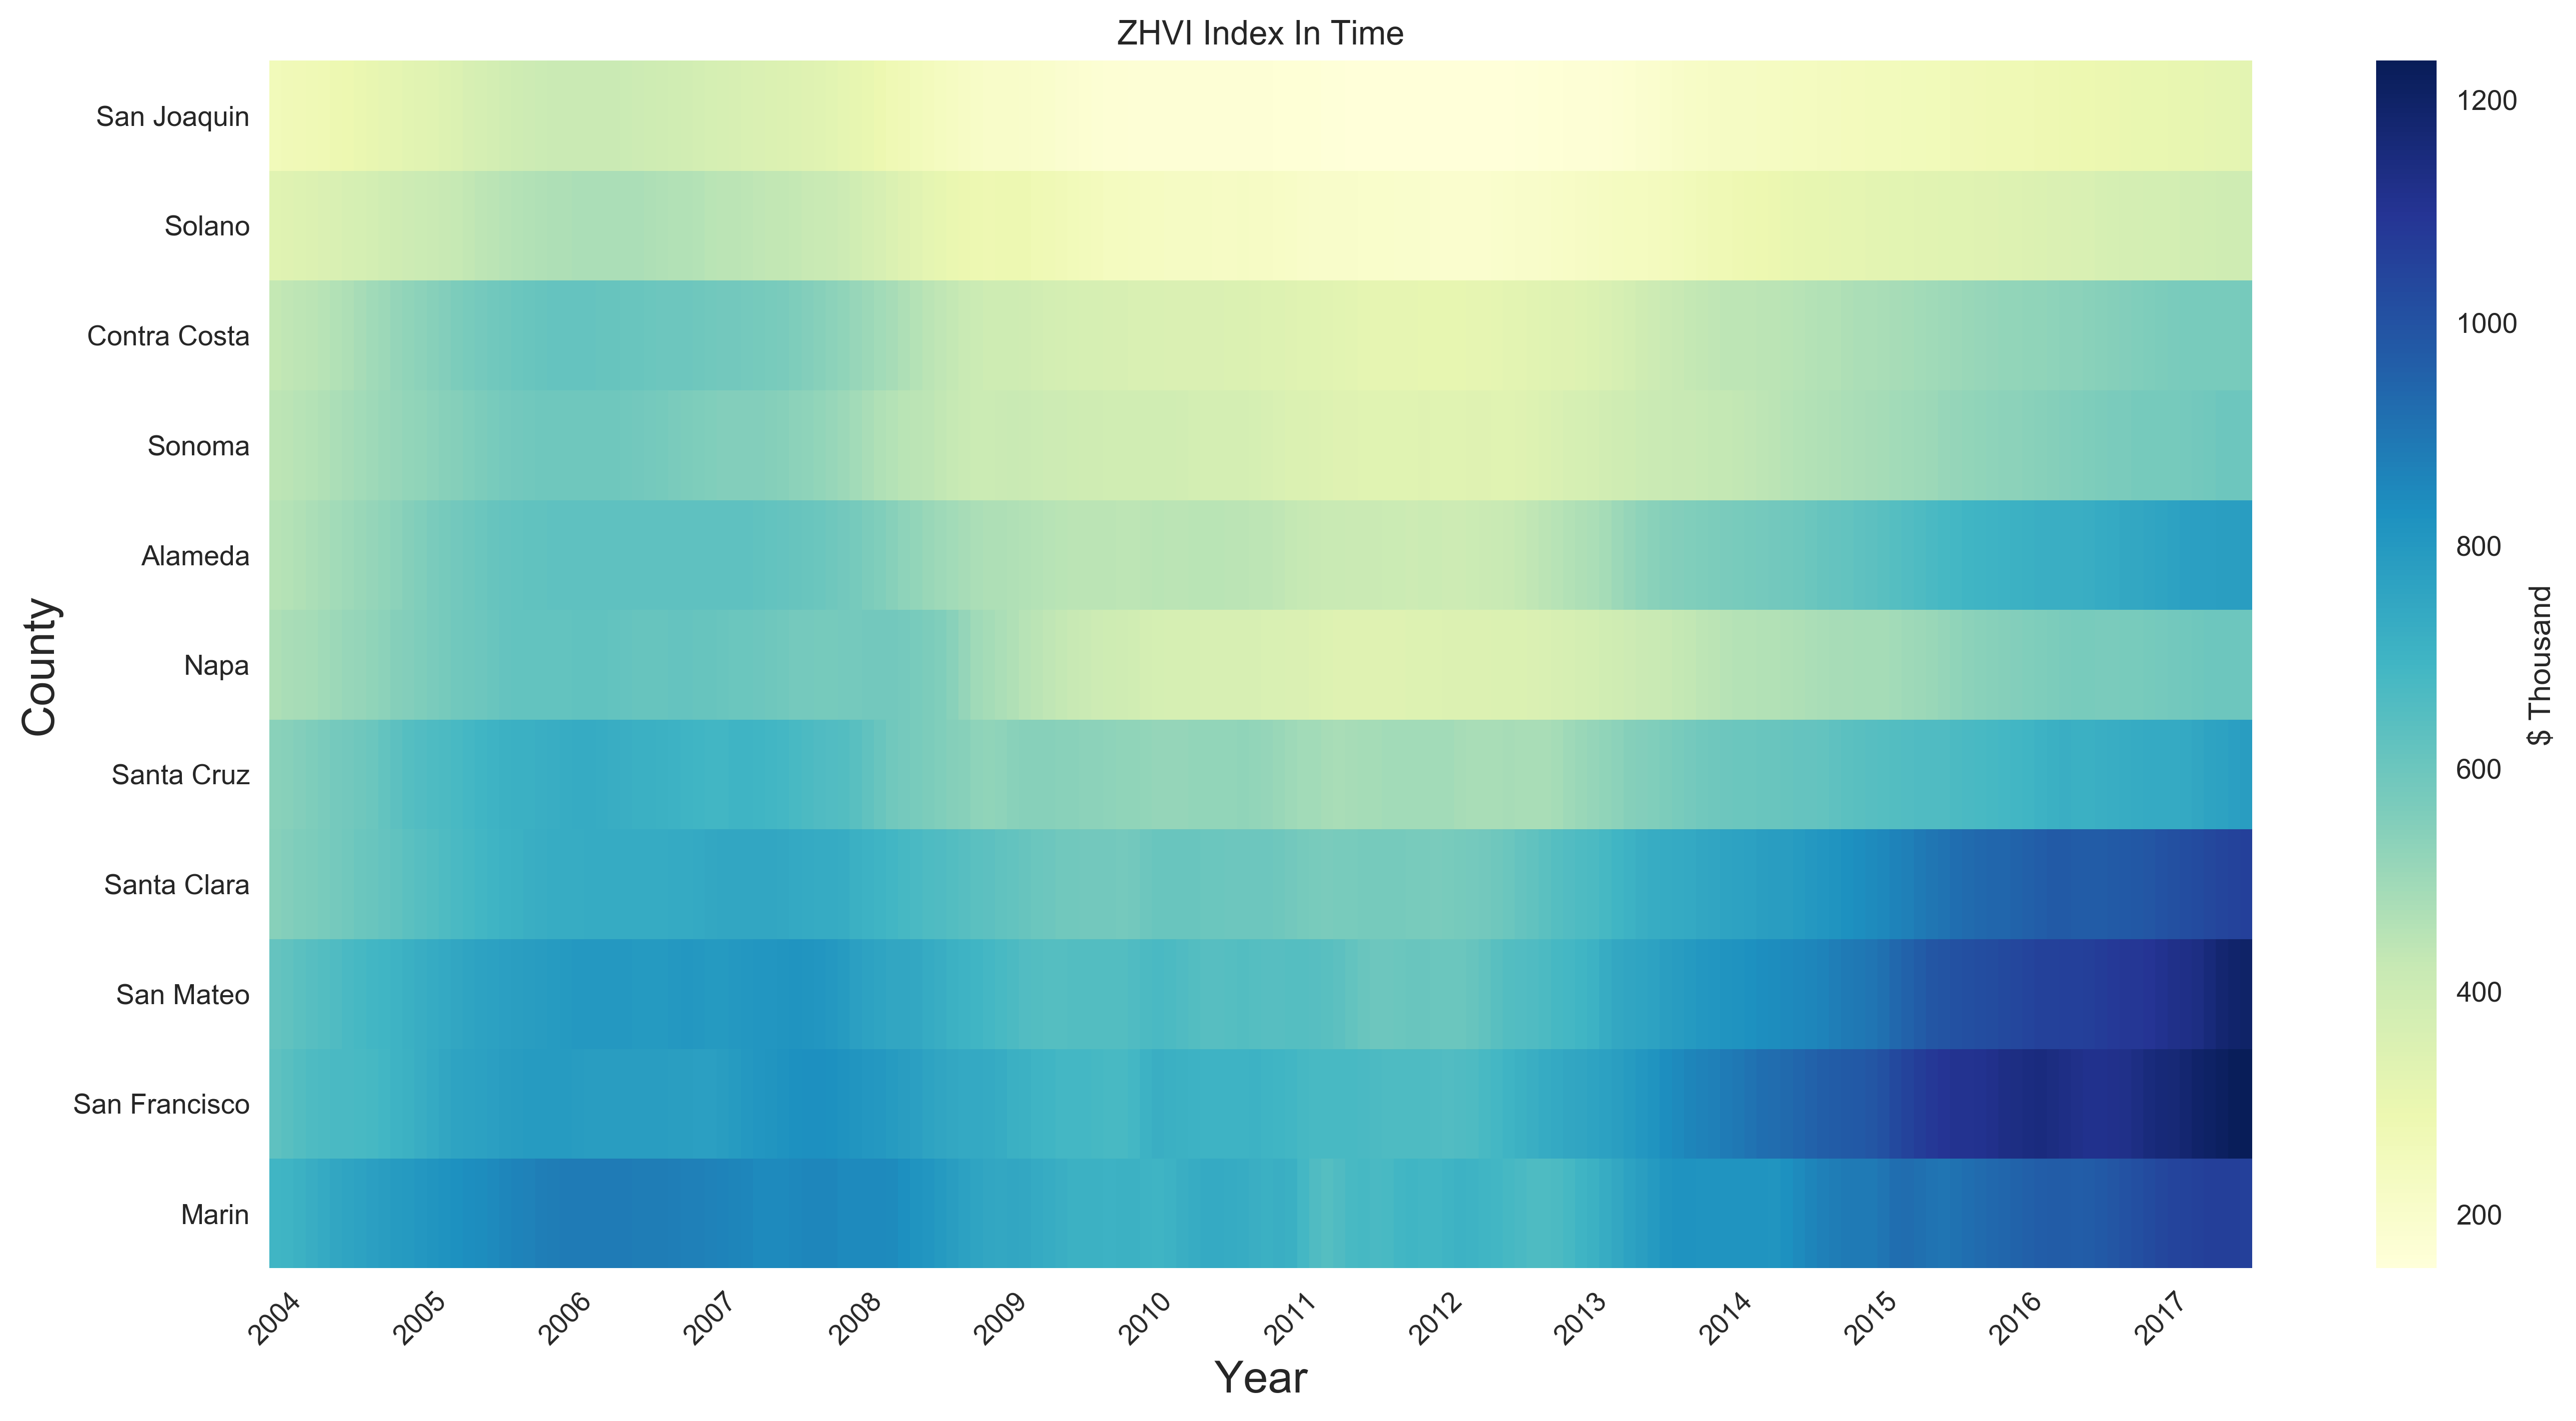

In [326]:
sns.set_style('white')
fig, ax =plt.subplots(figsize = (16,8), dpi = 400)
ax = sns.heatmap(df_mini, cmap="YlGnBu", xticklabels = 12, cbar_kws = {'label':'$ Thousand'})
ax.set_title('ZHVI Index In Time')
labels = ax.get_xticklabels() # get x labels
ax.set_xticklabels(np.arange(2004,2018,1), rotation = 45)
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('County', fontsize = 16)  
colorbar = ax.collections[0].colorbar
colorbar.set_ticks(np.arange(200000,1400000,200000))
colorbar.set_ticklabels(np.arange(200,1400,200))
plt.show()

In [327]:
#plot time series charts

def plotter(df, columnX, columnY,  y_ticks, y_tick_labels, x_label, title, y_label, figsize = (16,8), countyIds = countyIds, 
            loc = 'best'  ):
    fig, ax = plt.subplots(figsize = figsize, dpi = 400)
    for i, county in enumerate(countyIds):
        df_county_index = df['RegionName'].apply(lambda x: x == county)
        df_county = df.loc[df_county_index]  
        ax.plot(df_county[columnX], df_county[columnY], linewidth = 2.5, label = counties[i], 
                c = colors[i], alpha = 0.75 )
    ax.set_title(title)
    ax.set_xlabel(x_label, fontsize = 12)
    ax.set_ylabel(y_label, fontsize = 12)   
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.grid(linestyle = '-.', alpha= 0.4)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_tick_labels)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    plt.legend(loc = loc, frameon = False, ncol = 3)
    plt.show()


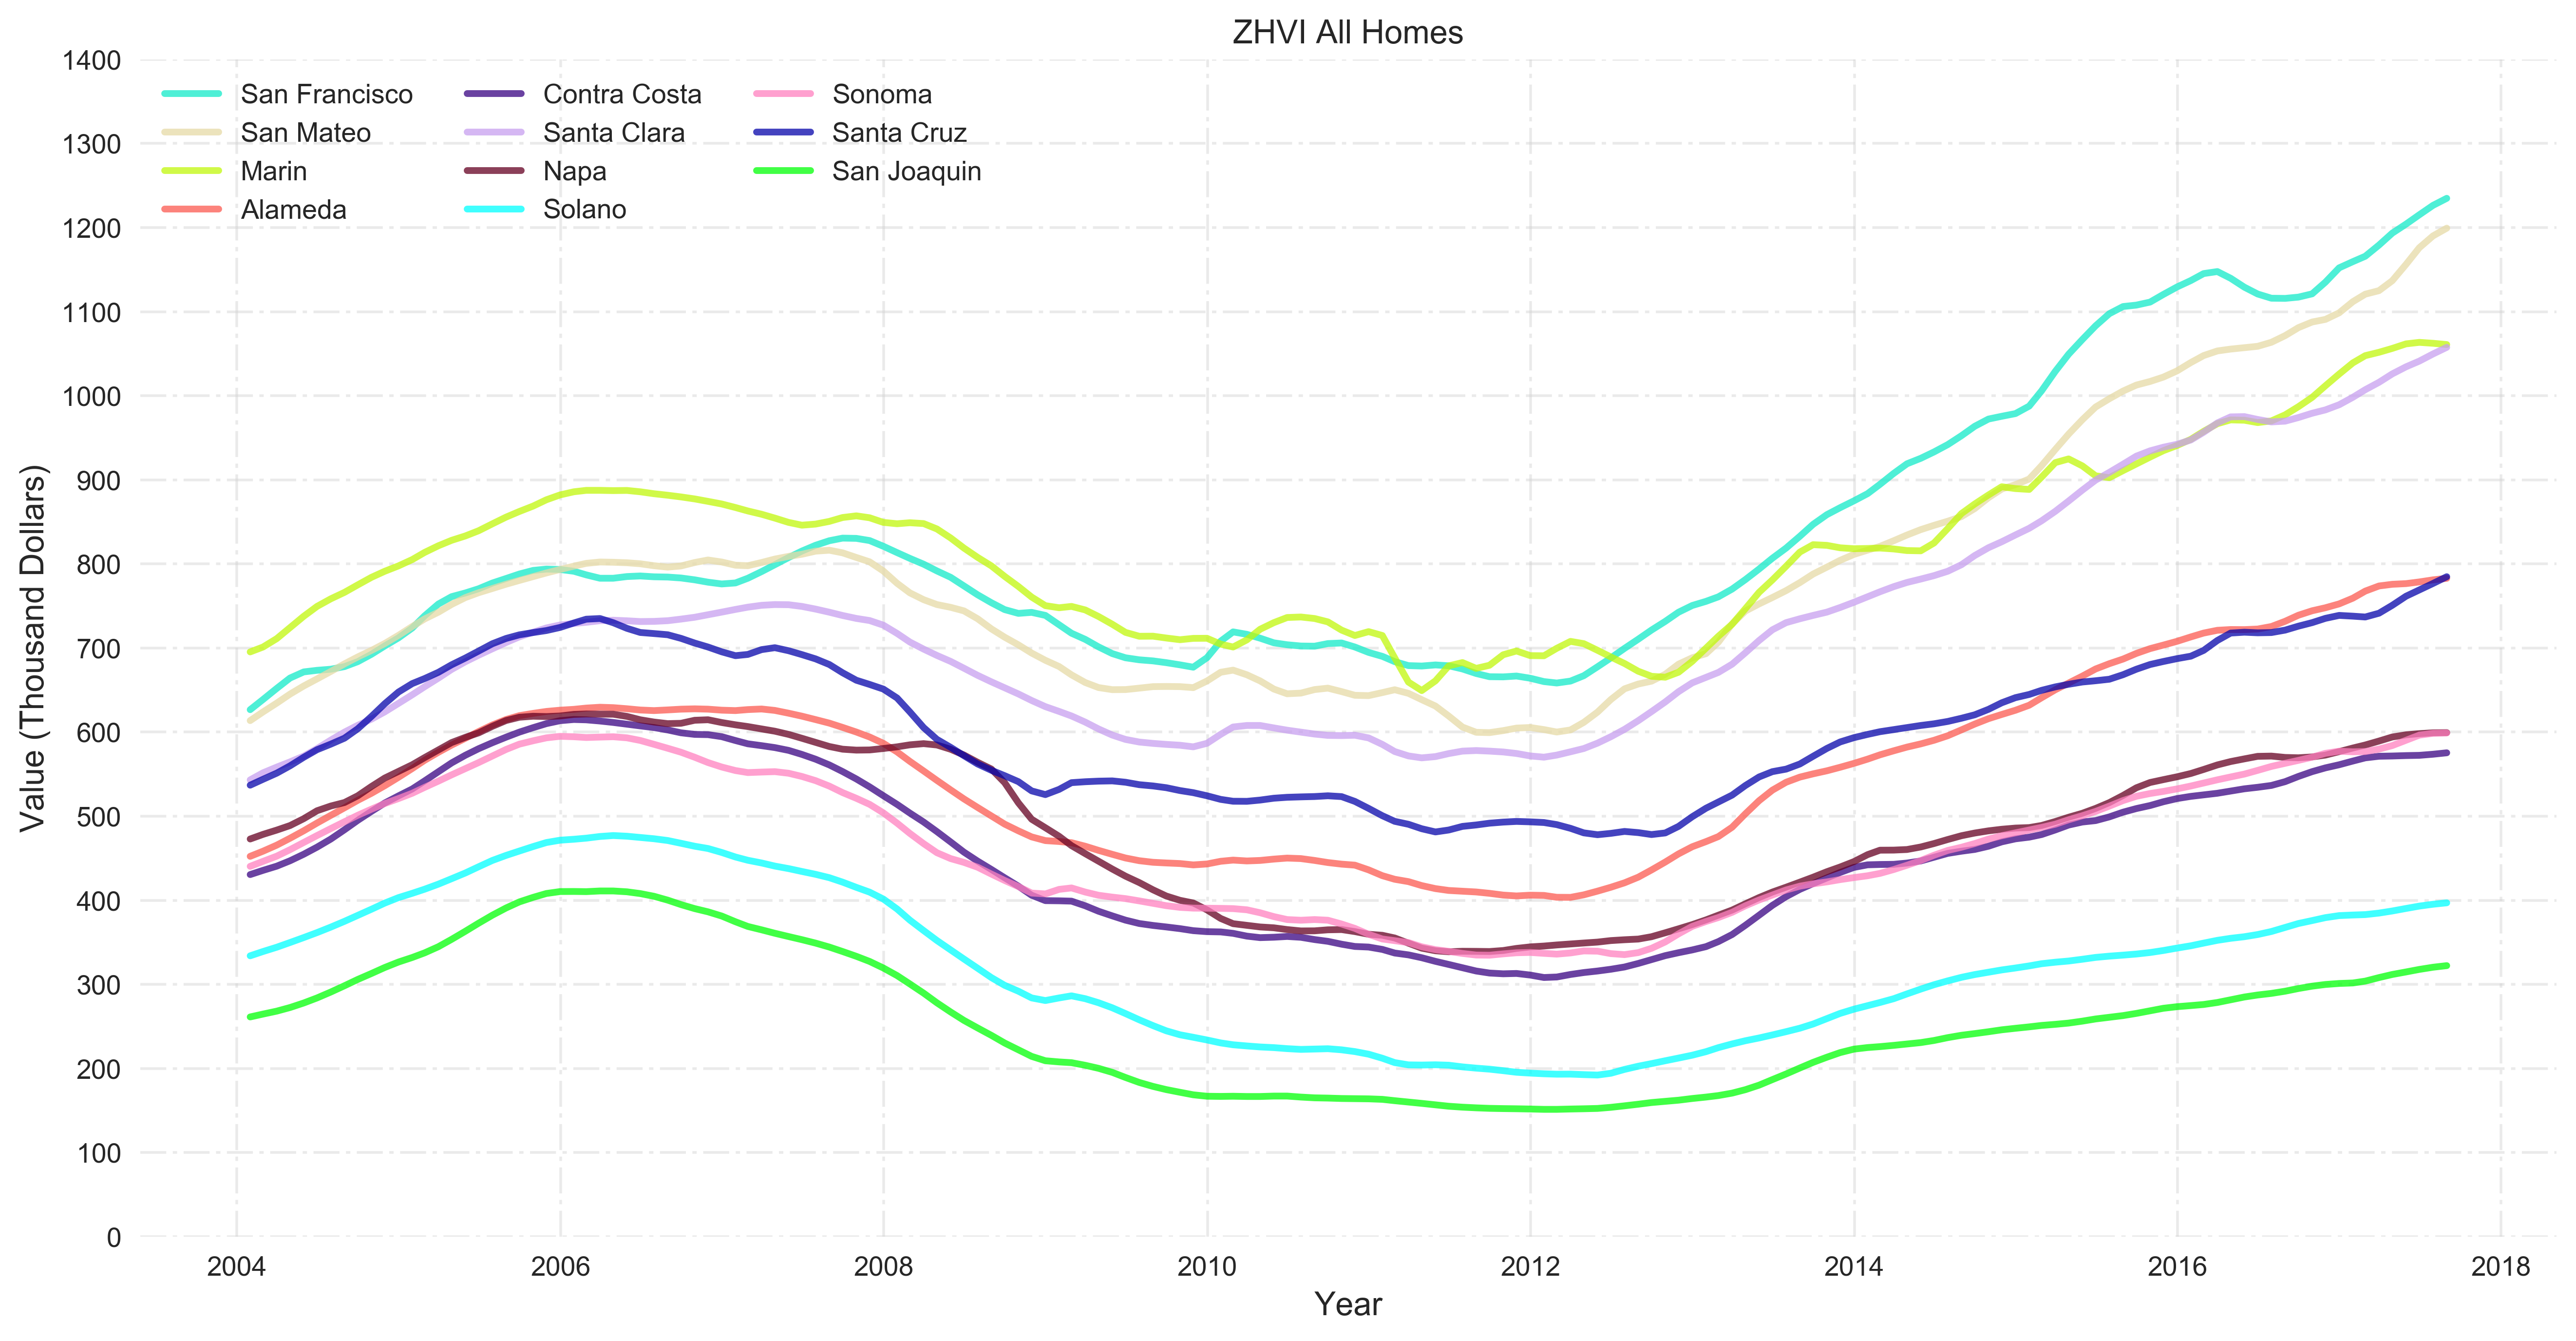

In [328]:
plotter(df = df_cut, columnX = 'Date', columnY = 'ZHVI_AllHomes', y_ticks = np.arange(0,1500000, 100000),
       y_tick_labels = np.arange(0,1500, 100), x_label = 'Year', title = 'ZHVI All Homes',
       y_label = 'Value (Thousand Dollars)')

We should introduce a feature, year on year change in ZHVI Index, which is a measure of capital appreciation. It represent strong drops in crisis period and the returns seems to be stabilized around 3%. Solano and San Joaquin were the counties with better price to rent ratios, yet they were also the states who experienced larger drops due to crisis. In addition, their returns have more variation (which is more risk). Overall, the heart of the Bay seems more stable in terms of both appreciation and depreciation. 

In [329]:
df_cut['YoY_ZHVI_SingleFamilyResidence'] = pd.Series(0, index = df_cut.index )
for county in countyIds:
    indexes = df_cut['RegionName'].apply(lambda x: x == county)
    df_county = df_cut.loc[indexes,:]
    df_county['Old_Index'] = df_county.index
    df_county = df_county.set_index('Date', drop = False)
    df_county['YoY_ZHVI_SingleFamilyResidence'] = (df_county['ZHVI_SingleFamilyResidence'] - df_county['ZHVI_SingleFamilyResidence'].shift(12)) / df_county['ZHVI_SingleFamilyResidence']
    df_county = df_county.set_index('Old_Index', drop = False)
    df_cut.loc[indexes,'YoY_ZHVI_SingleFamilyResidence']  = df_county.loc[indexes, 'YoY_ZHVI_SingleFamilyResidence']   

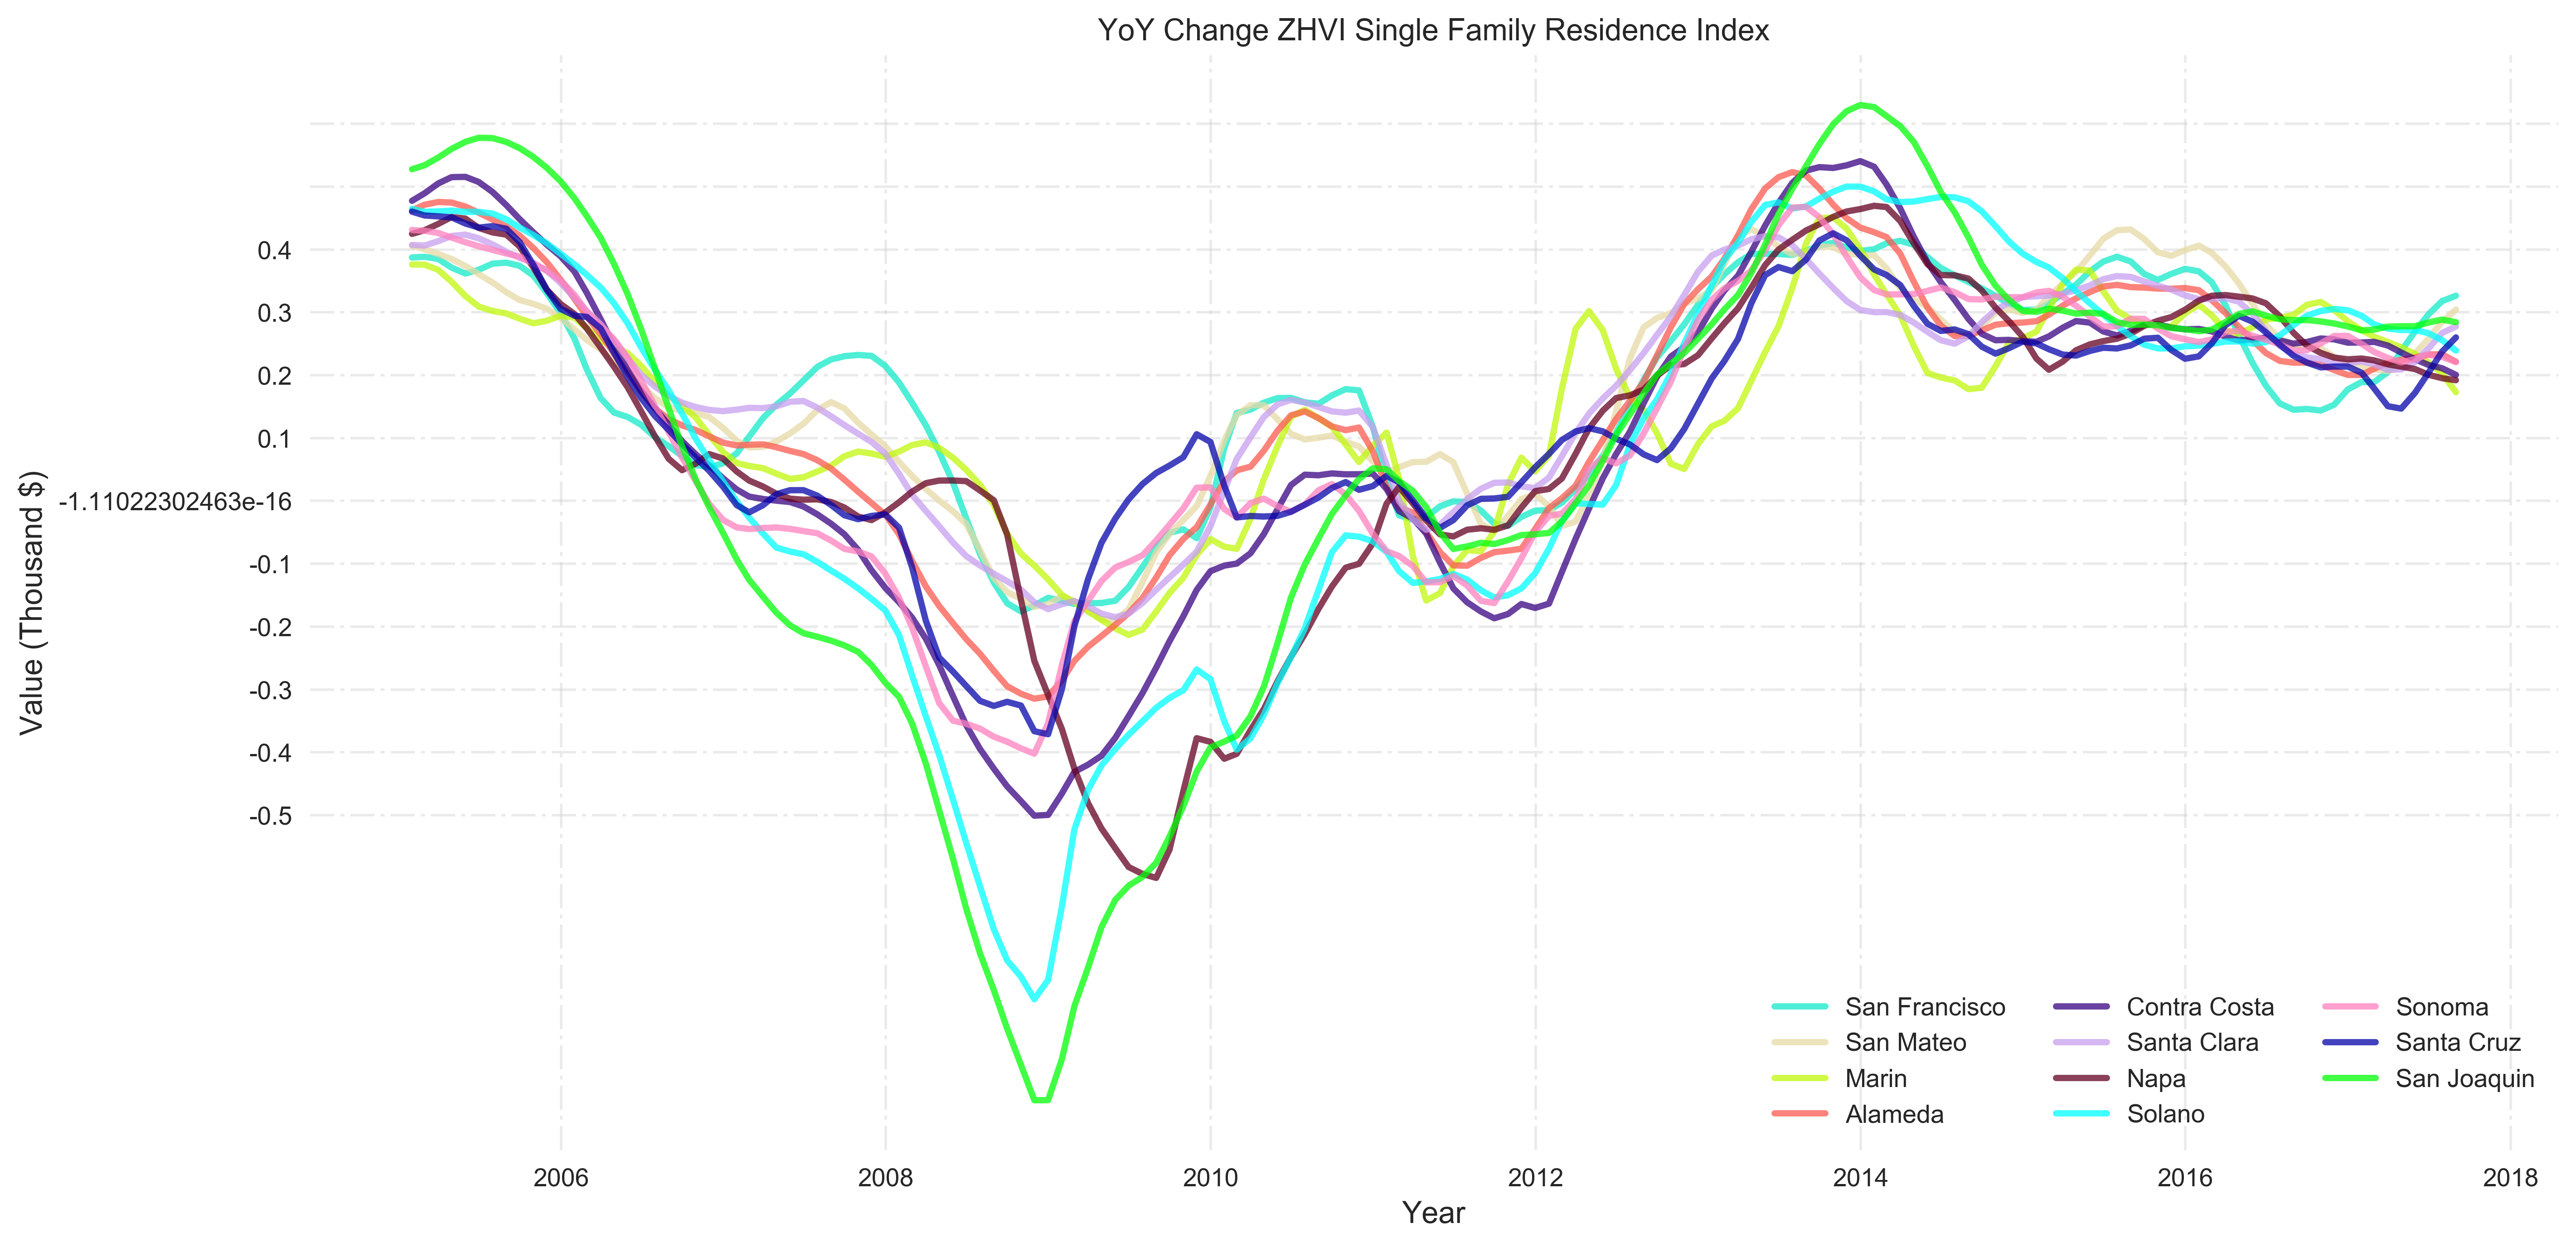

In [330]:
plotter(df = df_cut, columnX = 'Date', columnY = 'YoY_ZHVI_SingleFamilyResidence', y_ticks = np.arange(-0.30,0.30, 0.050), 
        y_tick_labels = np.arange(-0.50,0.50, 0.1), x_label = 'Year', title = 'YoY Change ZHVI Single Family Residence Index', 
        y_label = 'Value (Thousand $)' )

Next line chart shows the number of listing for each month given a region. In post crisis period supply drops sharply for all regions. 

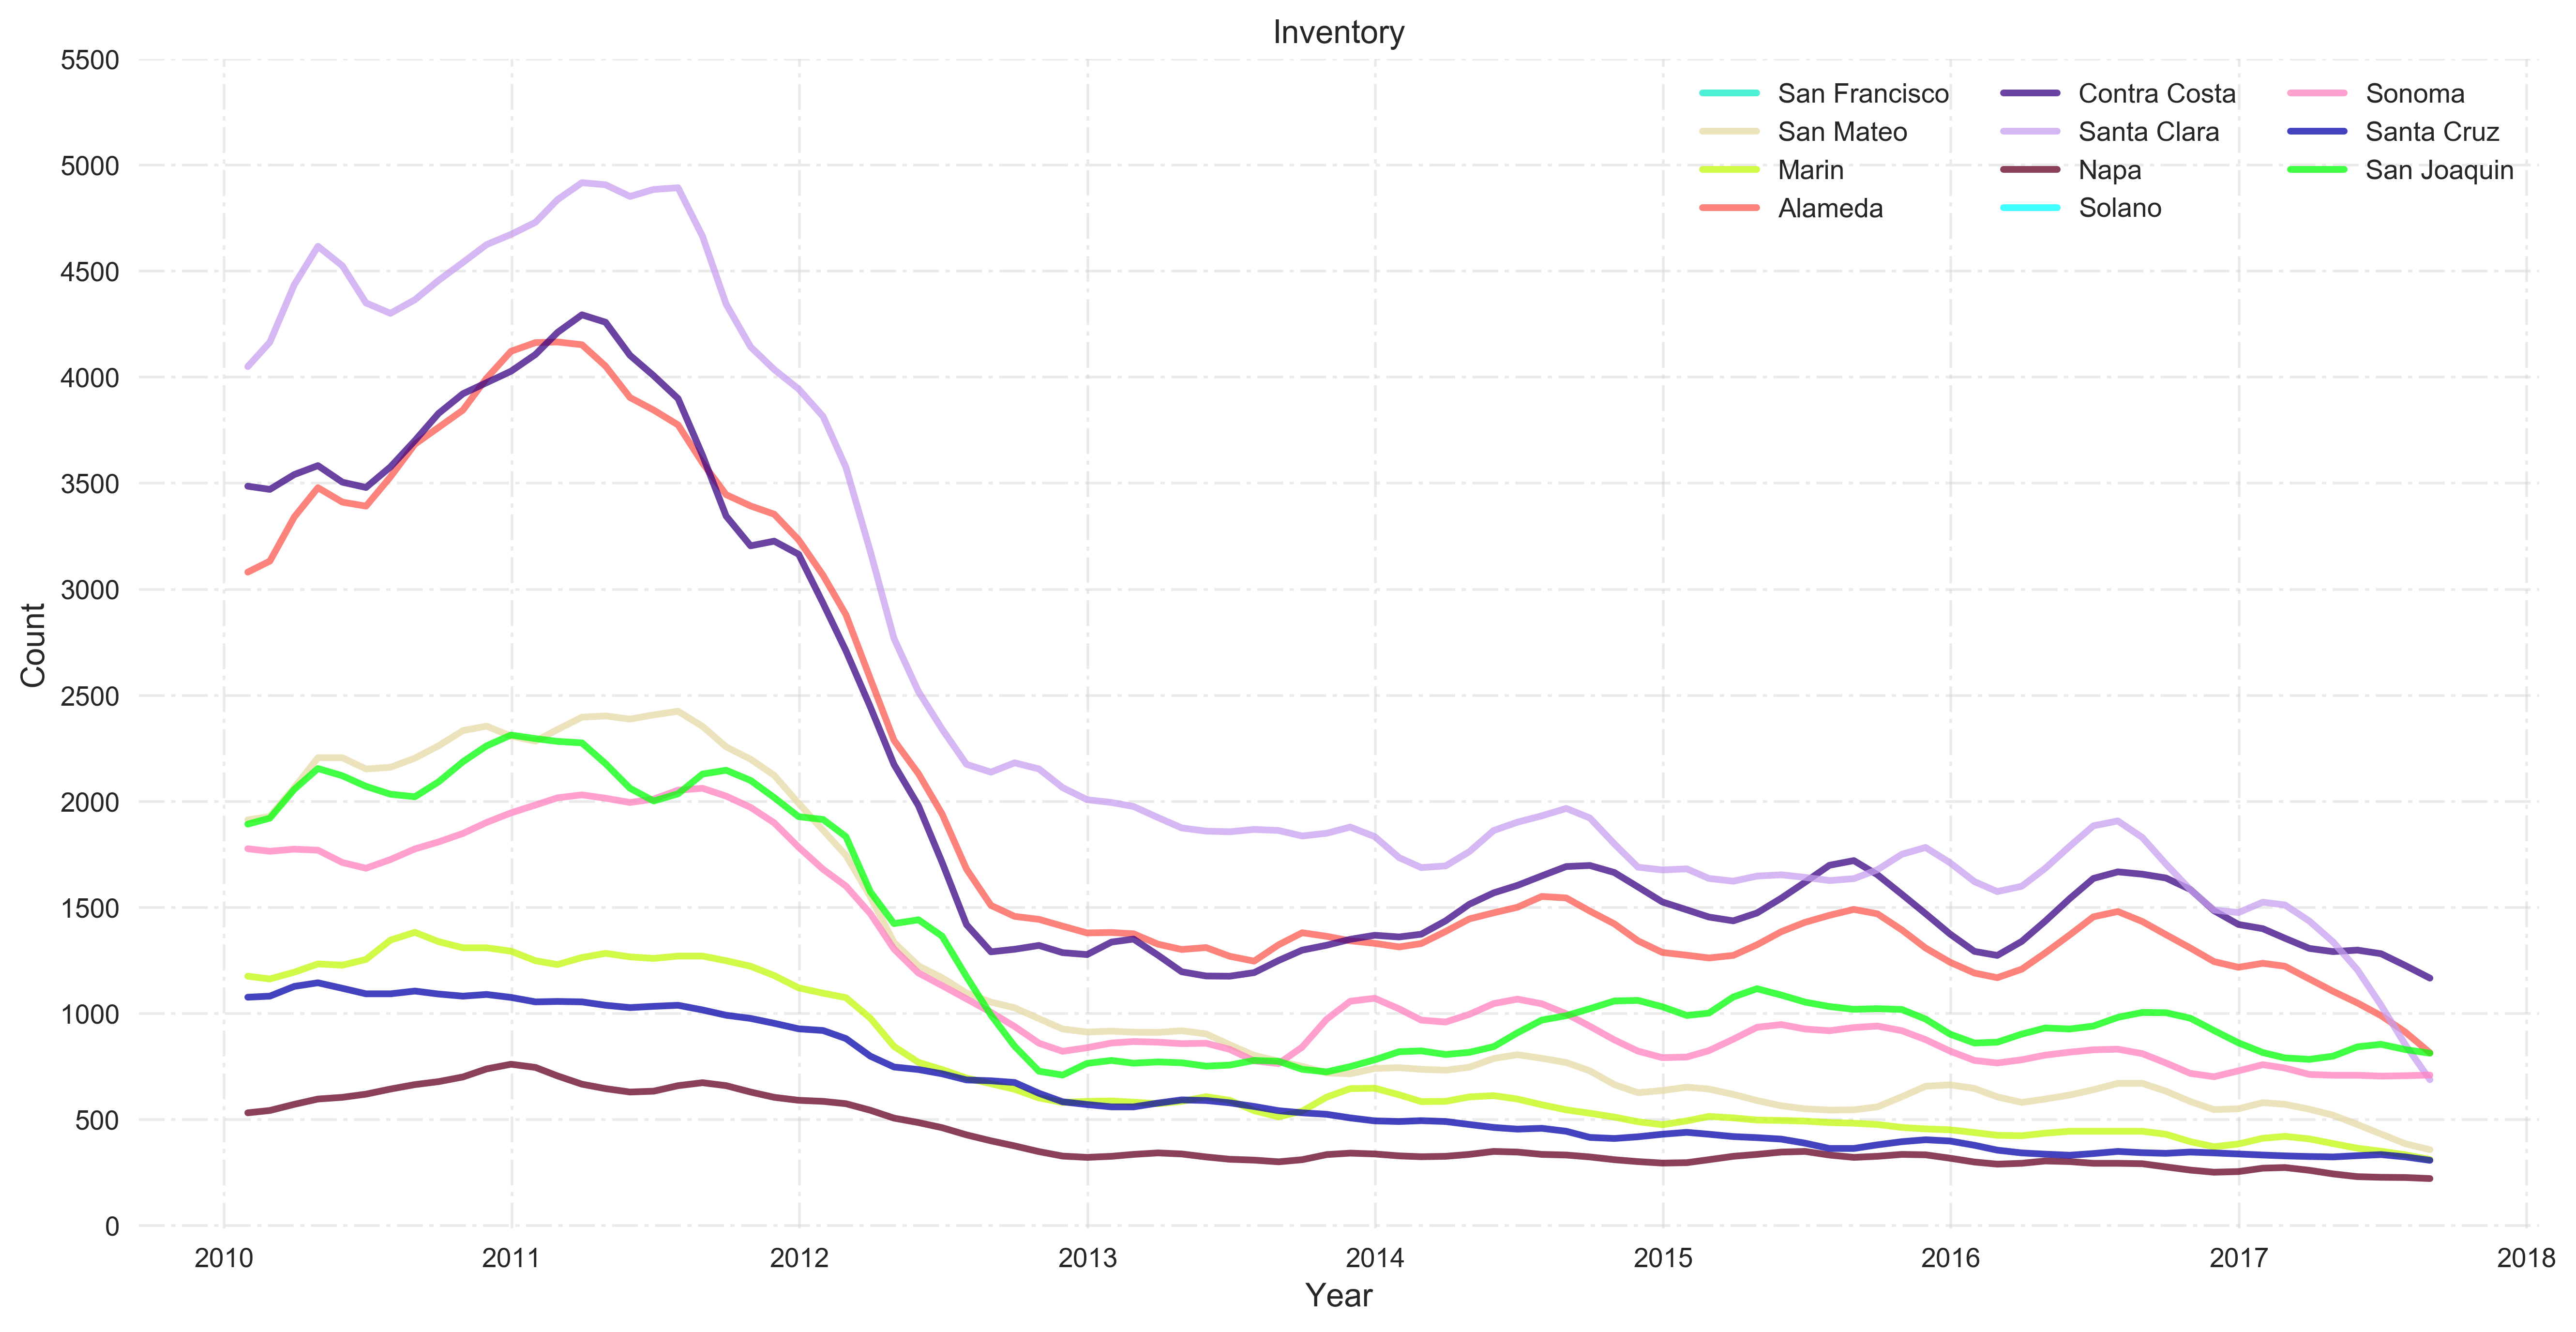

In [333]:
plotter(df = df_cut, columnX = 'Date', columnY = 'InventorySeasonallyAdjusted_AllHomes', 
        y_ticks = np.arange(0, 6000, 500), y_tick_labels = np.arange(0, 6000, 500), x_label = 'Year', title = 'Inventory', 
        y_label = 'Count' )

The following plot is particulary interesting since it visualizes the effect of crisis on different counties. 'Number of foreclosures' is the number of houses that are foreclosed per 10000 houses in a given month. These are the houses that were bought on credit(mortgage) and the owner had not been able to make the payments. San Joaquin, Solano and Contra Costa suffered more than the other counties. For several counties we see up and downs in the inventory is cyclical (supply increases from year start to mid-year). This may signal new contructions in county. However, in counties Napa and Santa Cruz this cyclical behavior is not really there. 

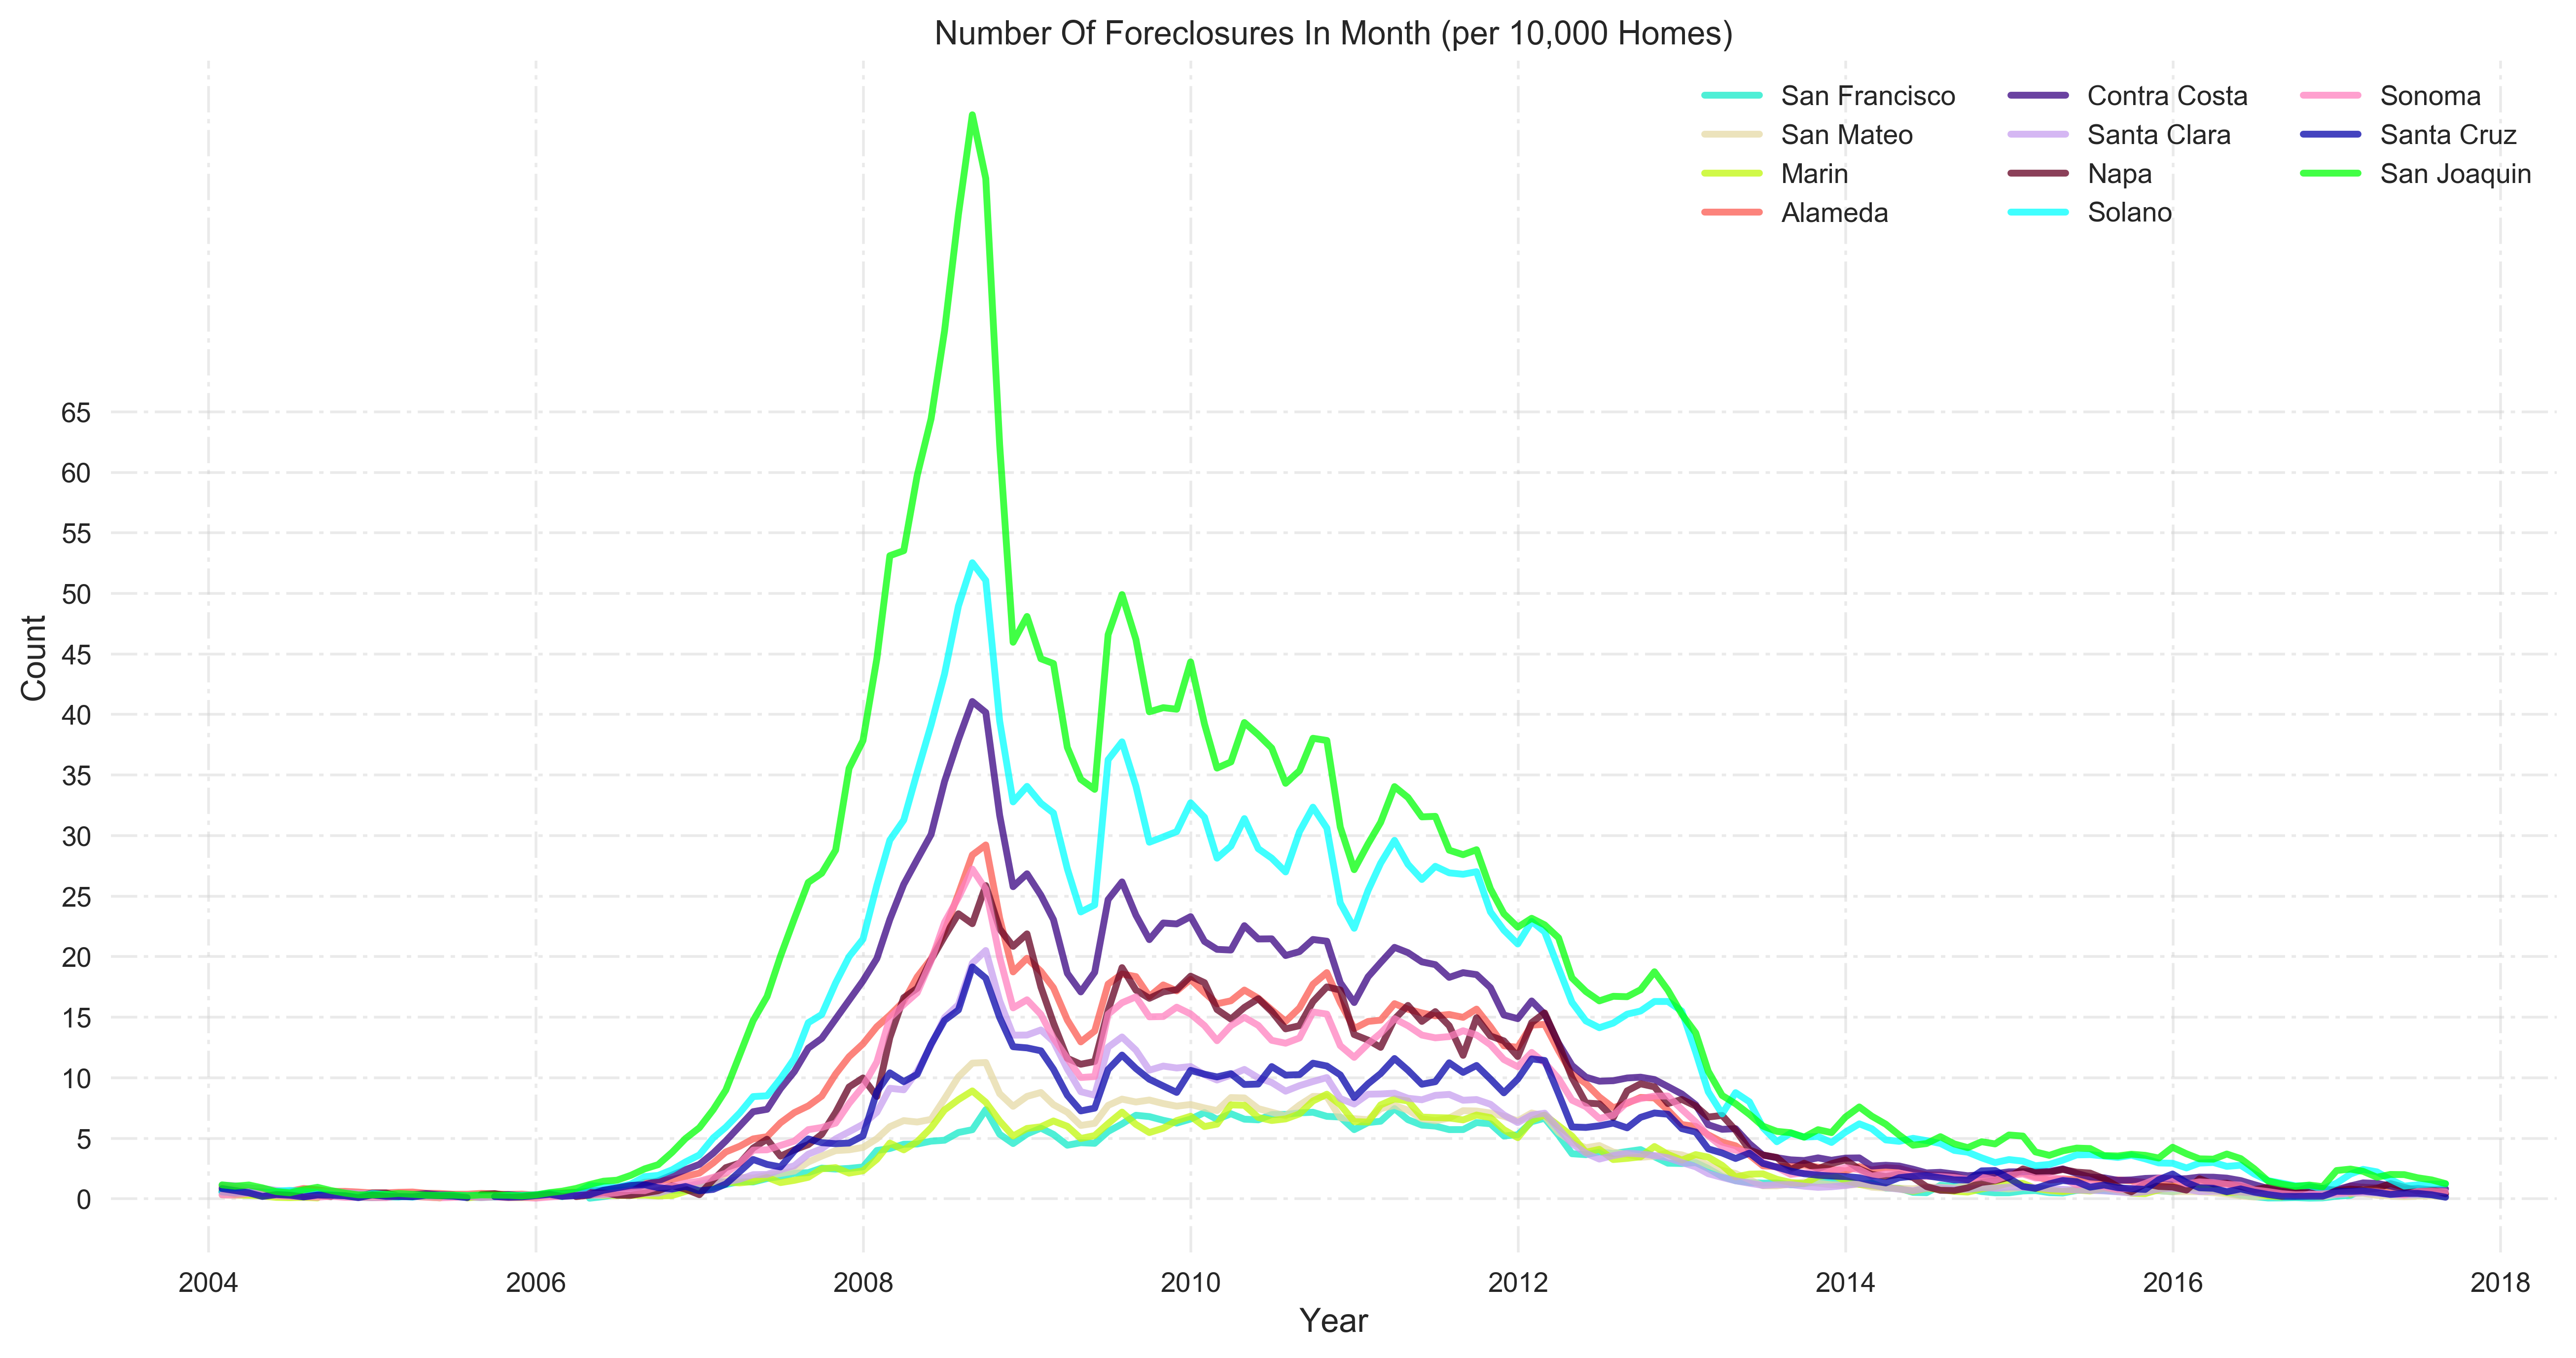

In [334]:
plotter(df = df_cut, columnX = 'Date', columnY = 'HomesSoldAsForeclosuresRatio_AllHomes', y_ticks = np.arange(0, 70, 5), 
        y_tick_labels = np.arange(0, 70, 5), x_label = 'Year', title = 'Number Of Foreclosures In Month (per 10,000 Homes)', 
        y_label = 'Count' )

This plots leads to a similar conclusion.

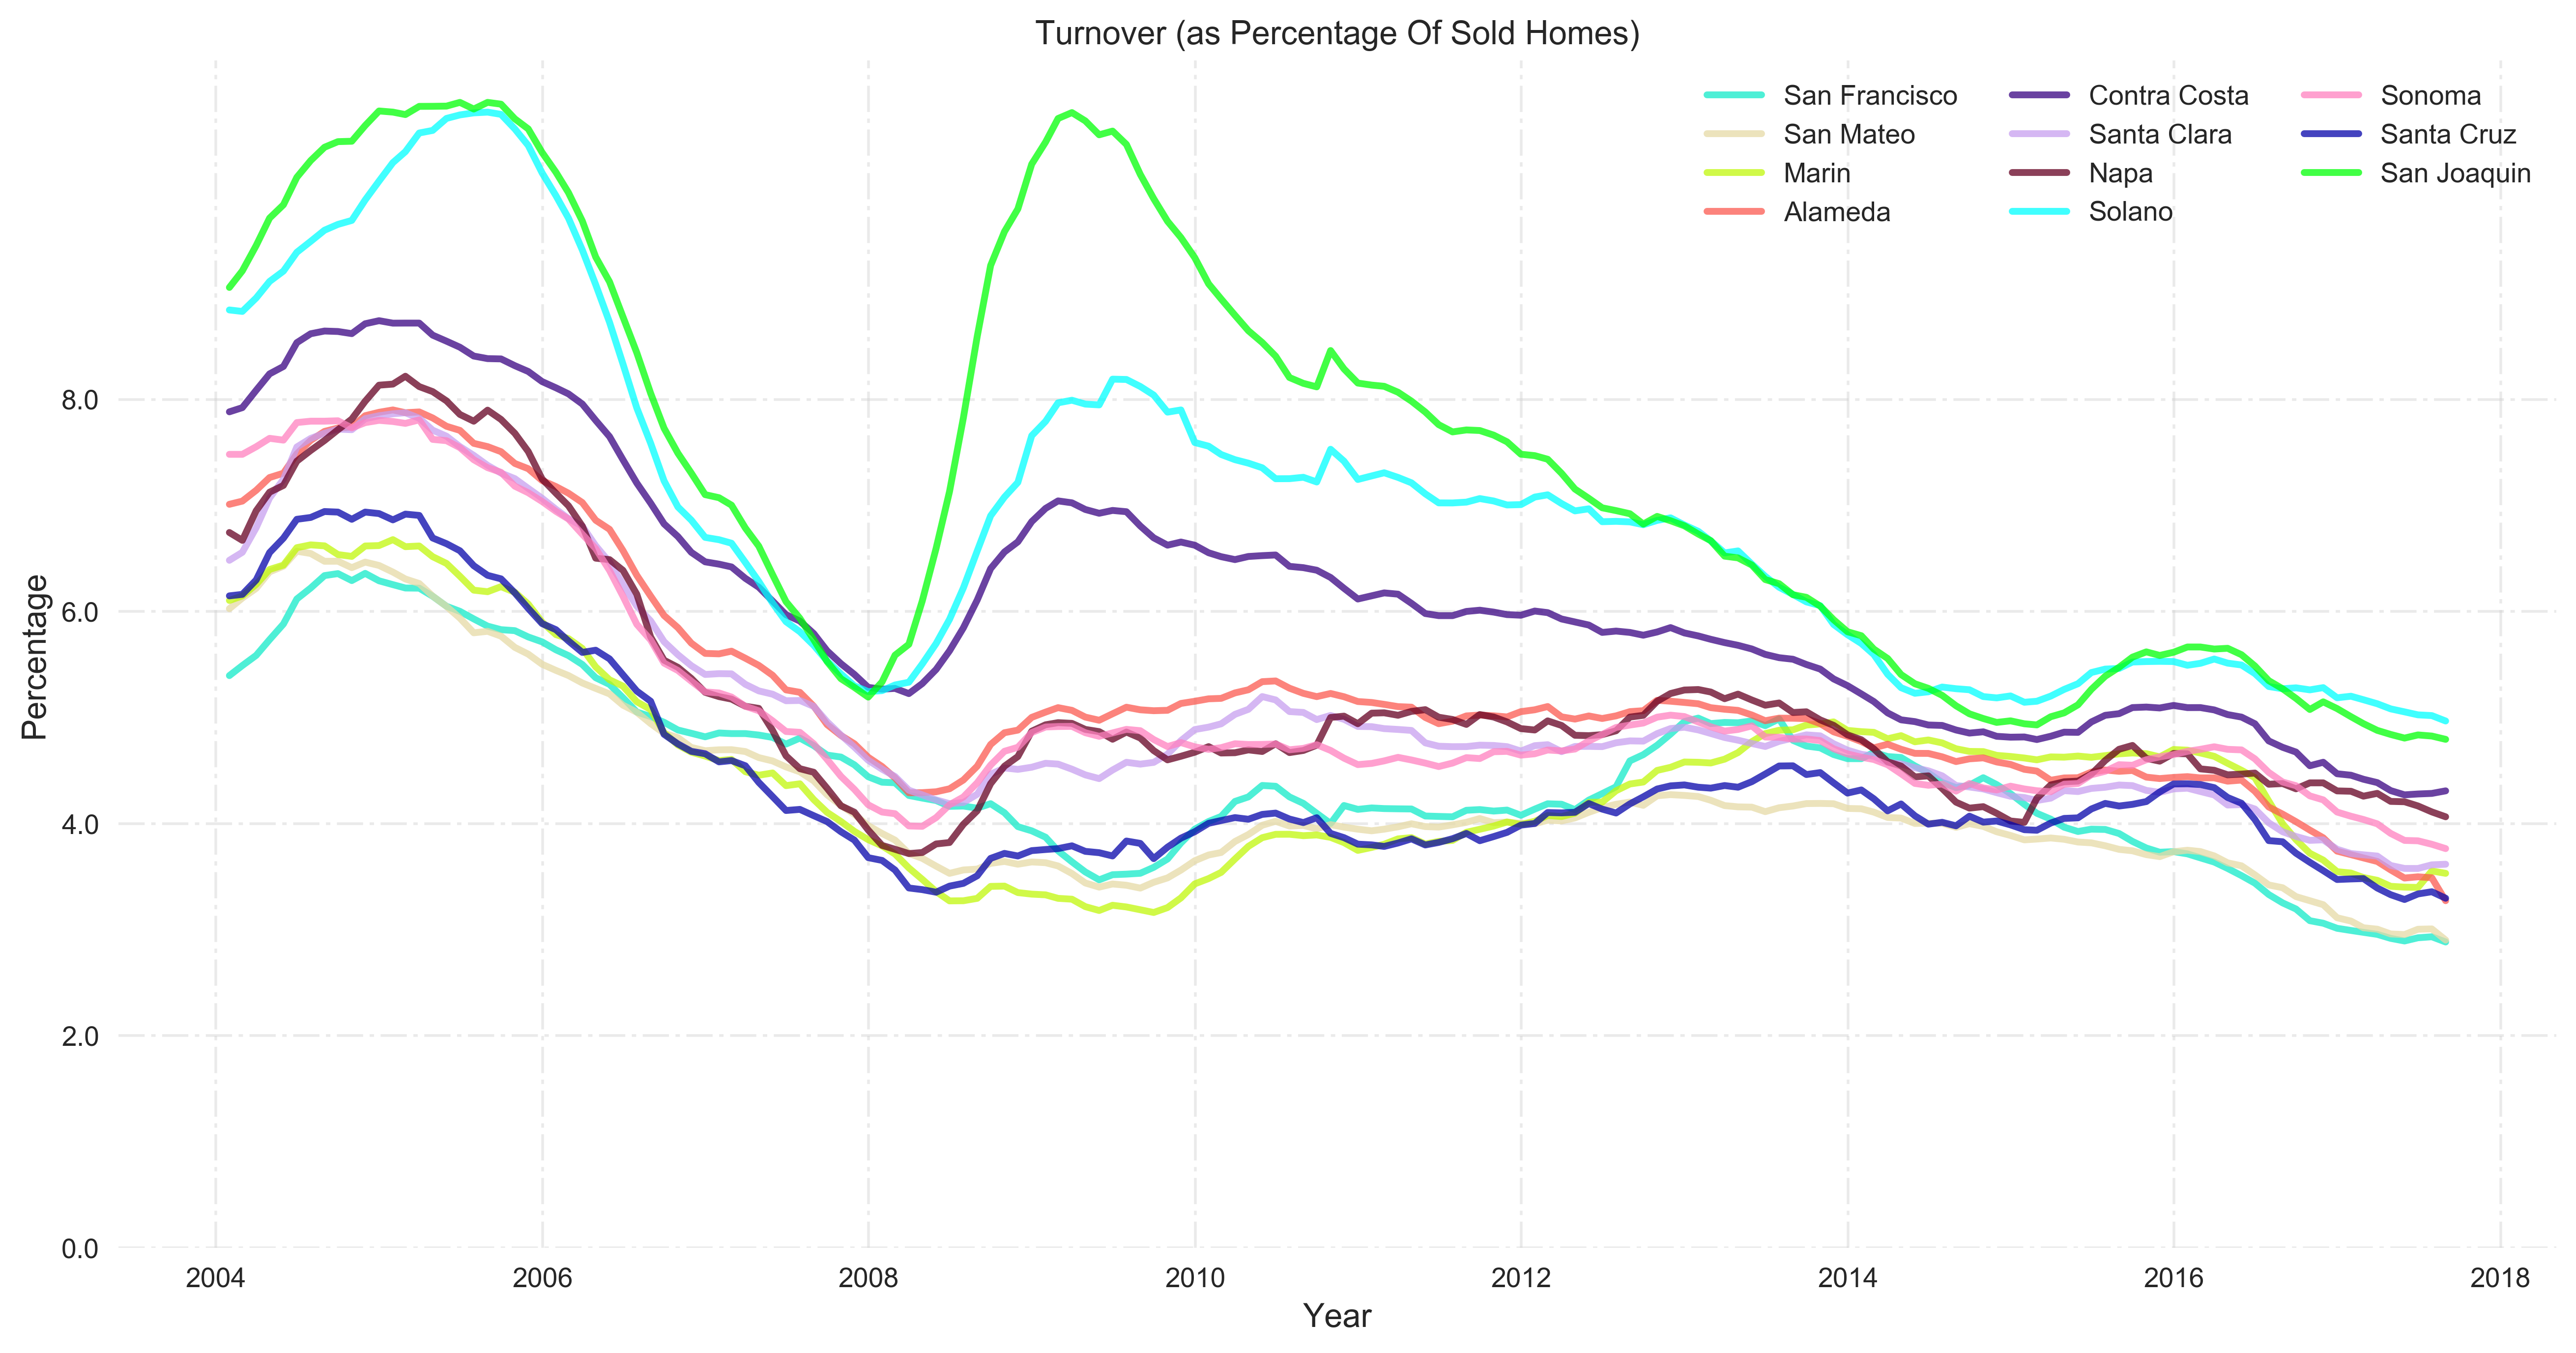

In [335]:
plotter(df = df_cut, columnX = 'Date', columnY = 'Turnover_AllHomes', y_ticks = np.arange(0., 10., 2), 
        y_tick_labels = np.arange(0., 10., 2), x_label = 'Year', title = 'Turnover (as Percentage Of Sold Homes)', 
        y_label = 'Percentage' )

Finally, let us look at the change in the price to rent ratio. The area overall keeps getting more expensive as investment every year.

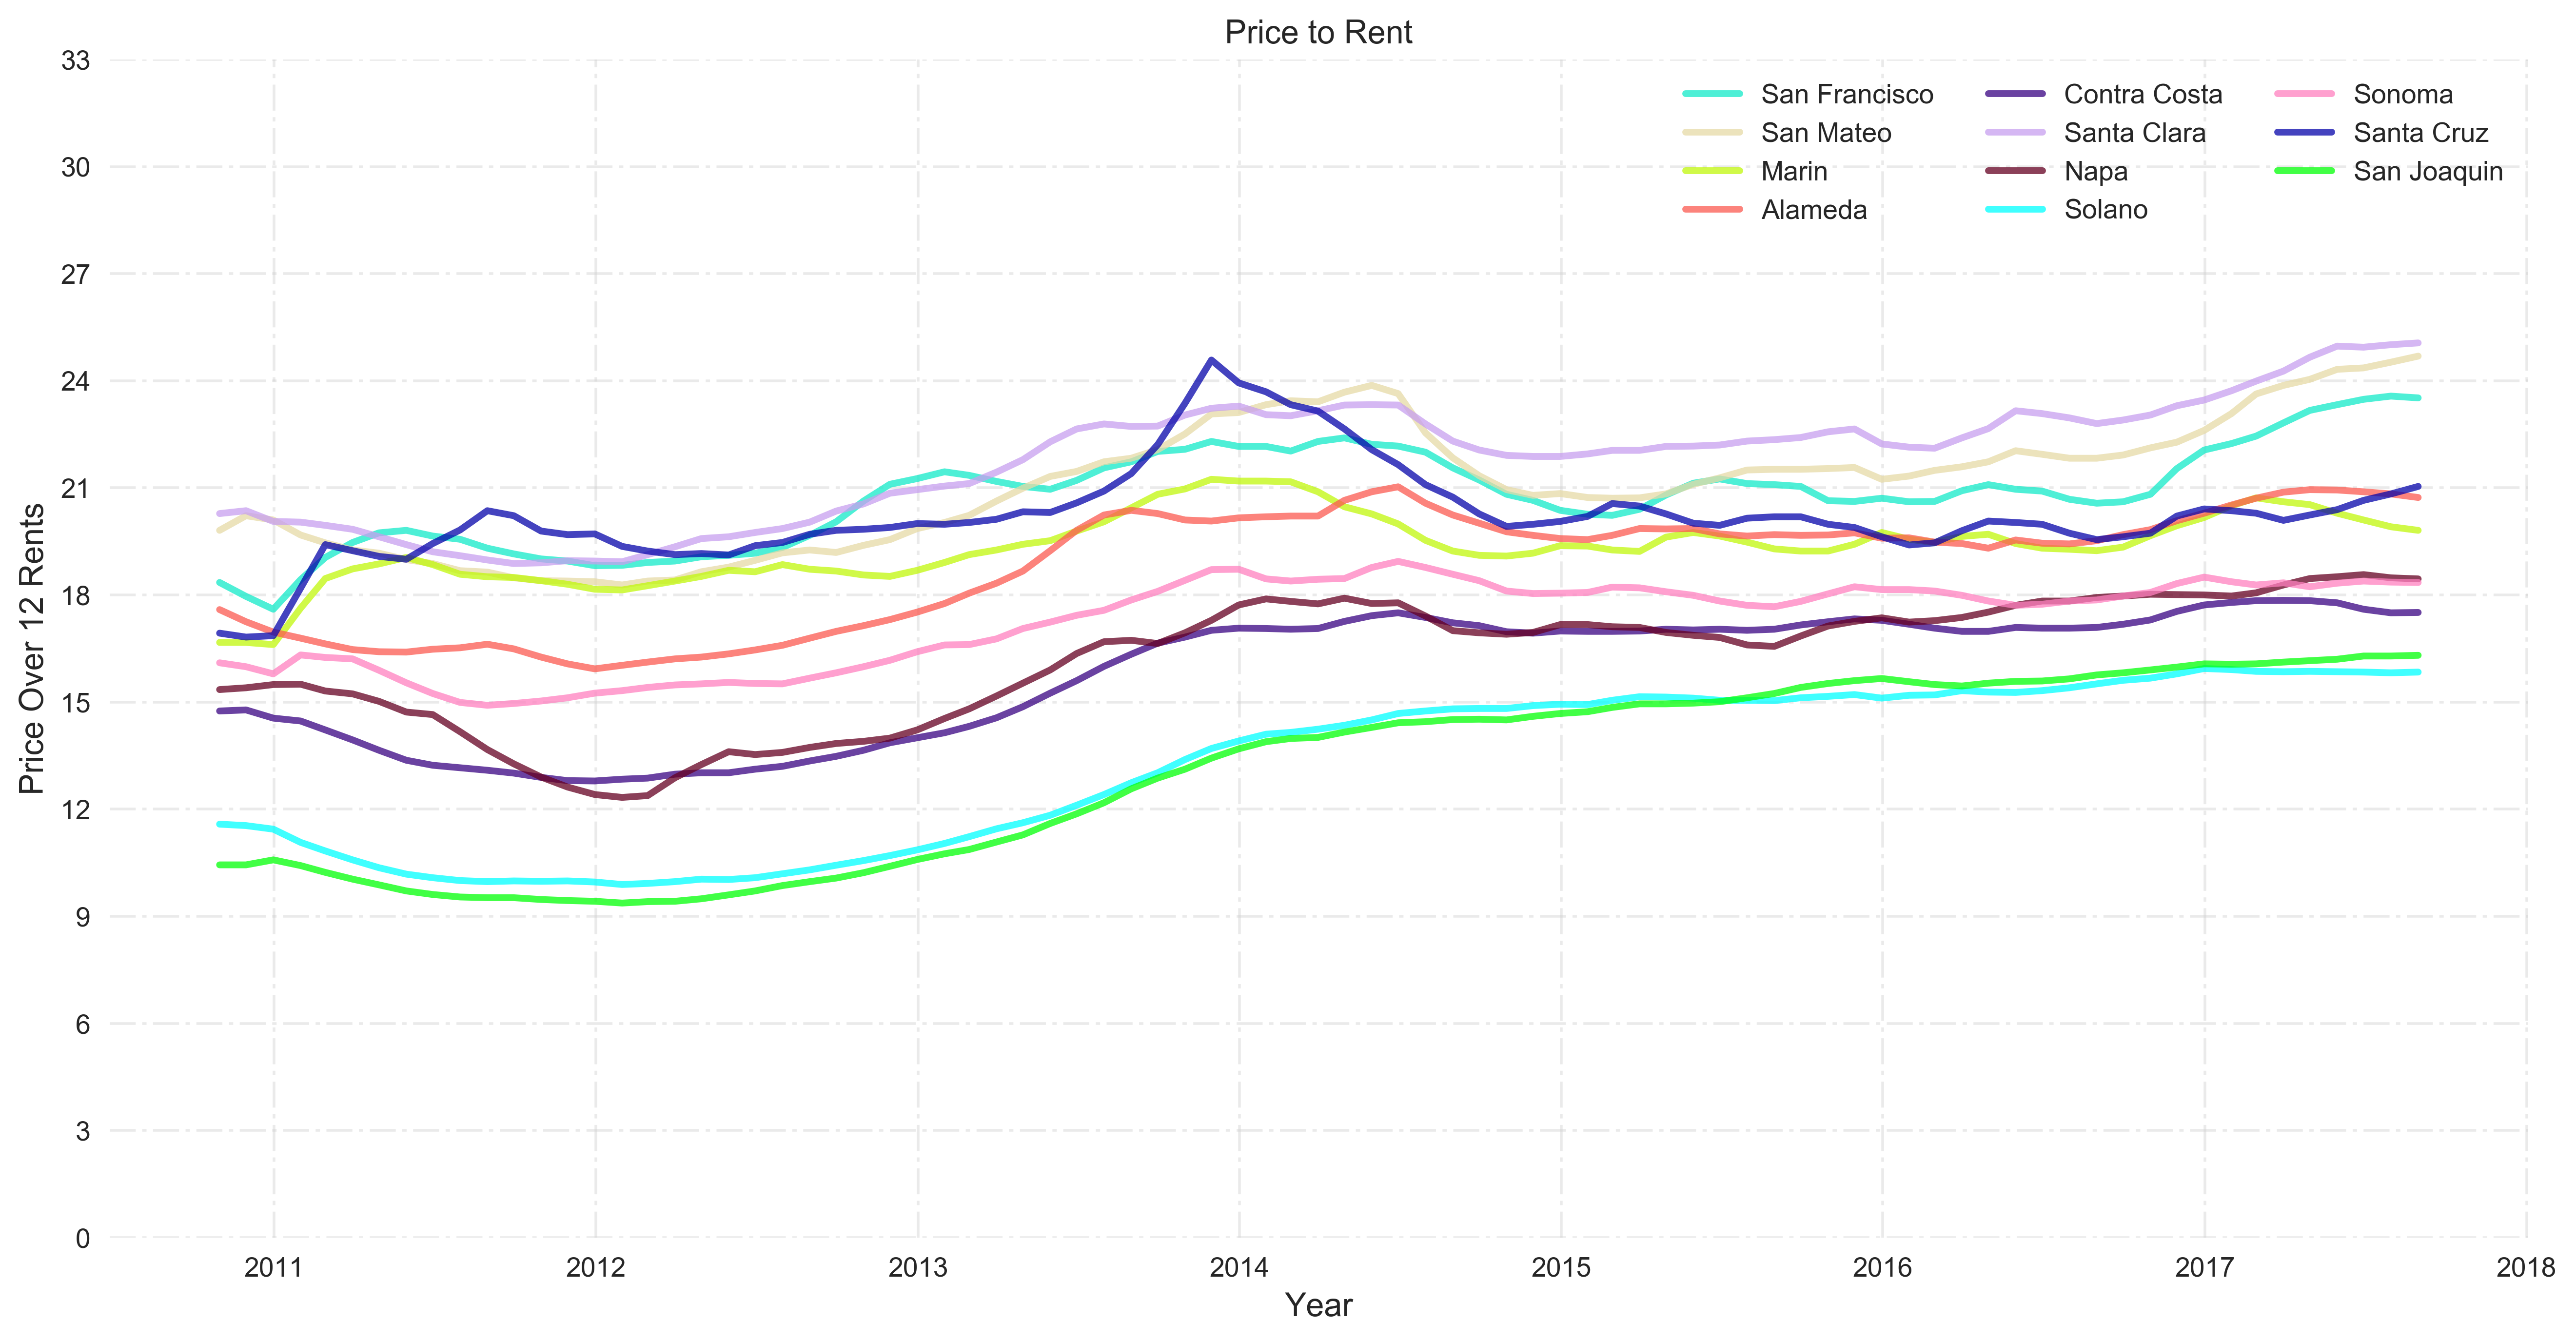

In [336]:
plotter(df = df_cut, columnX = 'Date', columnY = 'PriceToRentRatio_AllHomes', y_ticks = np.arange(0, 36, 3), 
        y_tick_labels = np.arange(0, 36, 3), x_label = 'Year', title = 'Price to Rent', 
        y_label = 'Price Over 12 Rents' )

### Conclusion

This project discussed the current state and the development of the real estate market in the Greater Bay Area. I conclude that the post crisis recovery is not completely over for the region. The prices for parts in the center of the region had been relatively stable (although dropped) during the crisis while counties farther on the perimeter experienced stronger fluctuations during the period. However, counties in the second group are the ones with better current price to rent ratios and lower prices. Basic risk-return relationship is observed.